# Principal Component Analysis Assignment

Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve)) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('wine.csv')
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

# Exploratory Data Analysis

In [4]:
data['Type'].unique()

array([1, 2, 3], dtype=int64)

In [5]:
data['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [7]:
X = data.drop('Type', axis = 1)
y = data['Type']

In [8]:
X.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [9]:
X.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453         0.572359    2.318286    0.228572   
min      0.340000       0.130000         0.410000    1.280000    0.480000   
25%      1.205000       0.270000         1.250000    3.220000    0.782500   
50%      2.135000       0.340000         1.555000    4.690000    0.965000   
75%      2.875000       0.437500         1.950000    6.200000    1.120000   
max      5.080000       0.660000         3.580000   13.000000    1.710000   

         Dilution      Proline  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [12]:
X.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Therefore, there is no null values.

In [13]:
X.duplicated().sum()

0

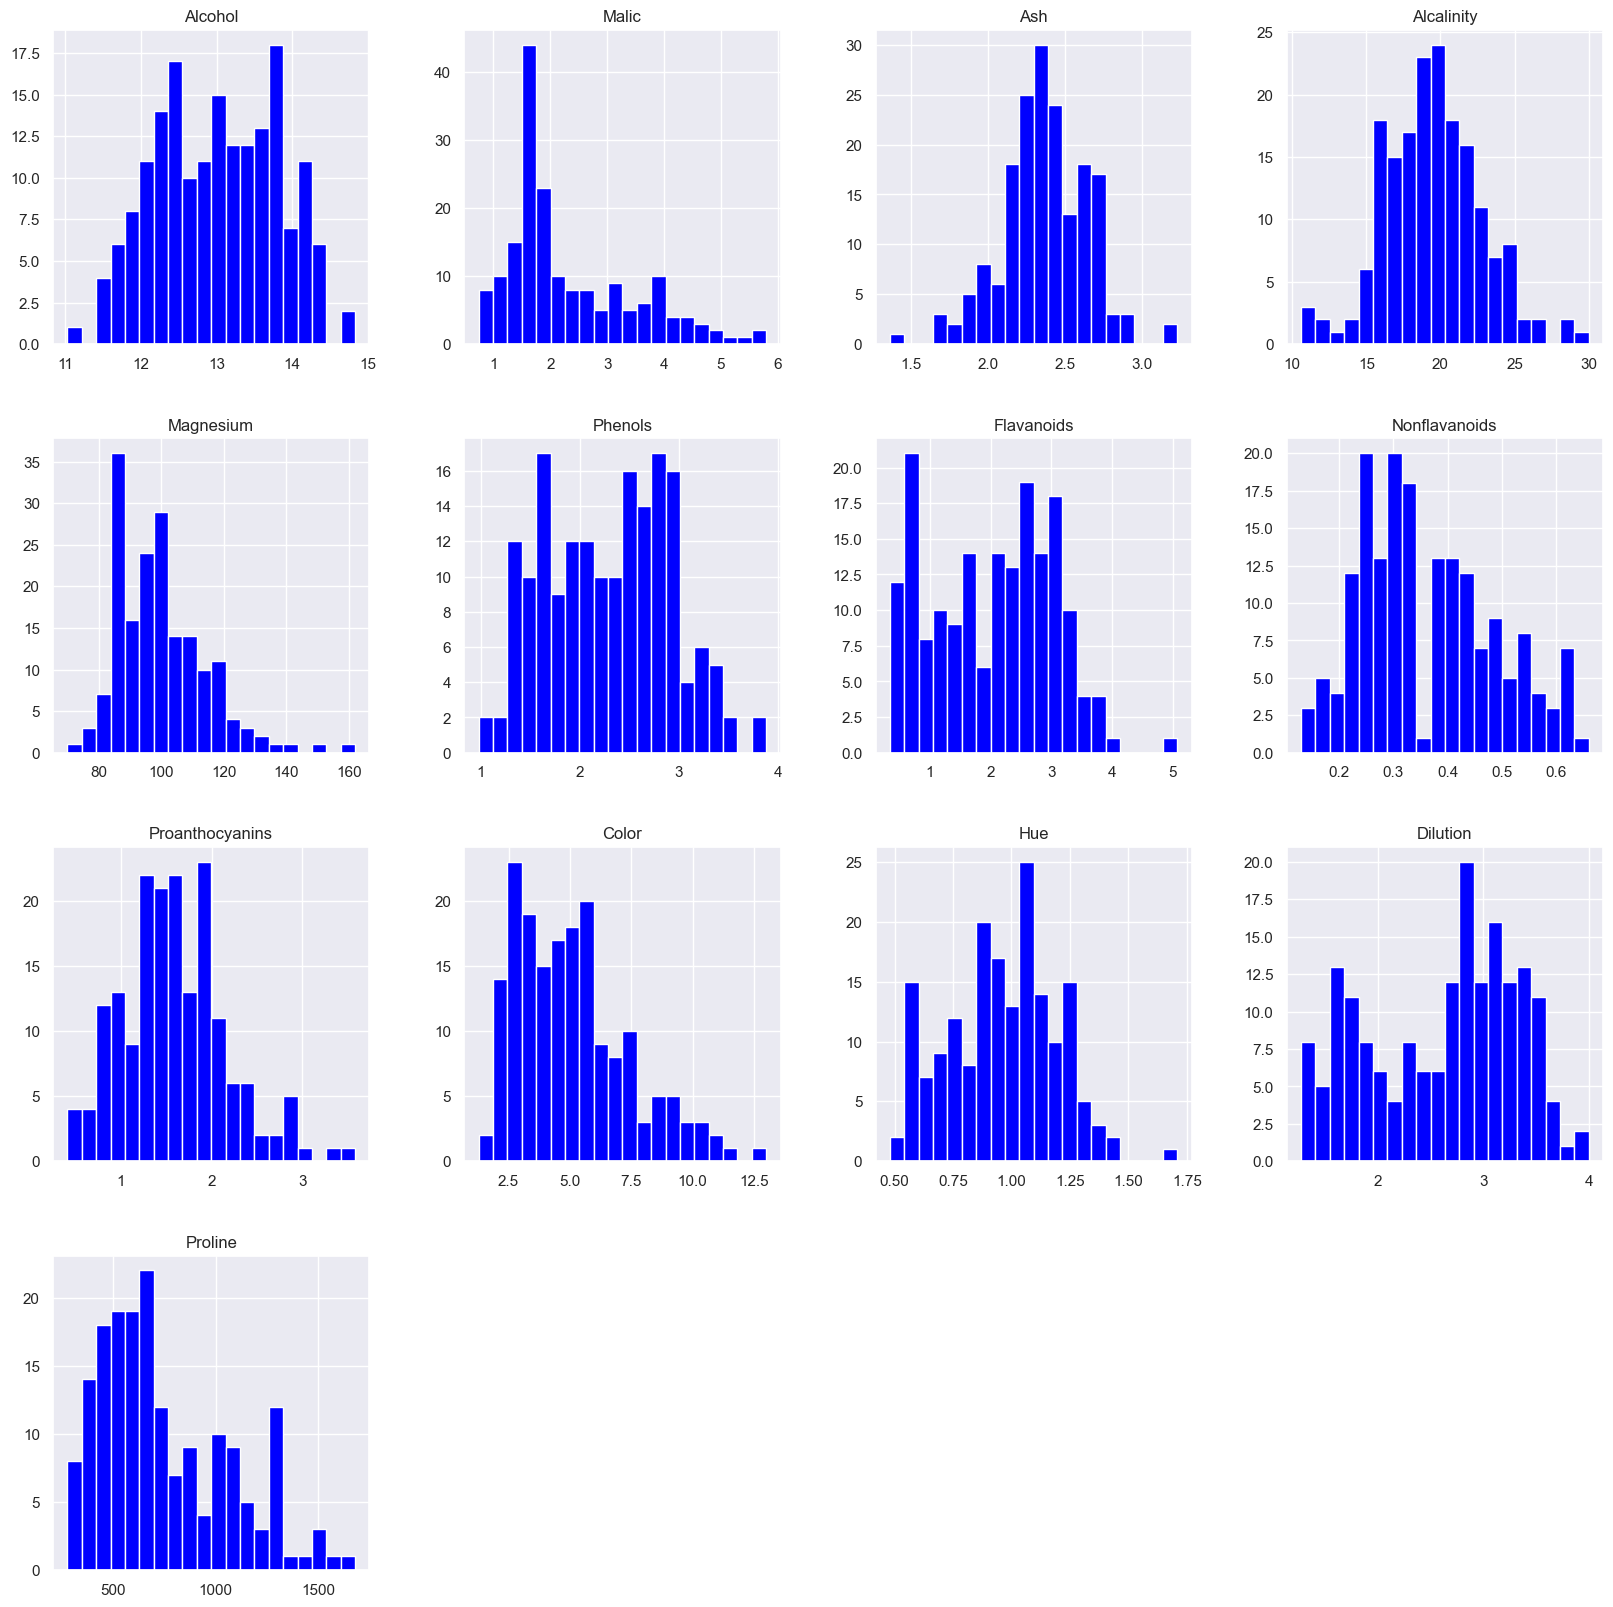

In [16]:
sns.set(style = 'dark', rc = {'figure.figsize':(20,20)})
ax = X.hist(bins = 20, color = 'blue')

In [17]:
X.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [18]:
col_names = X.columns

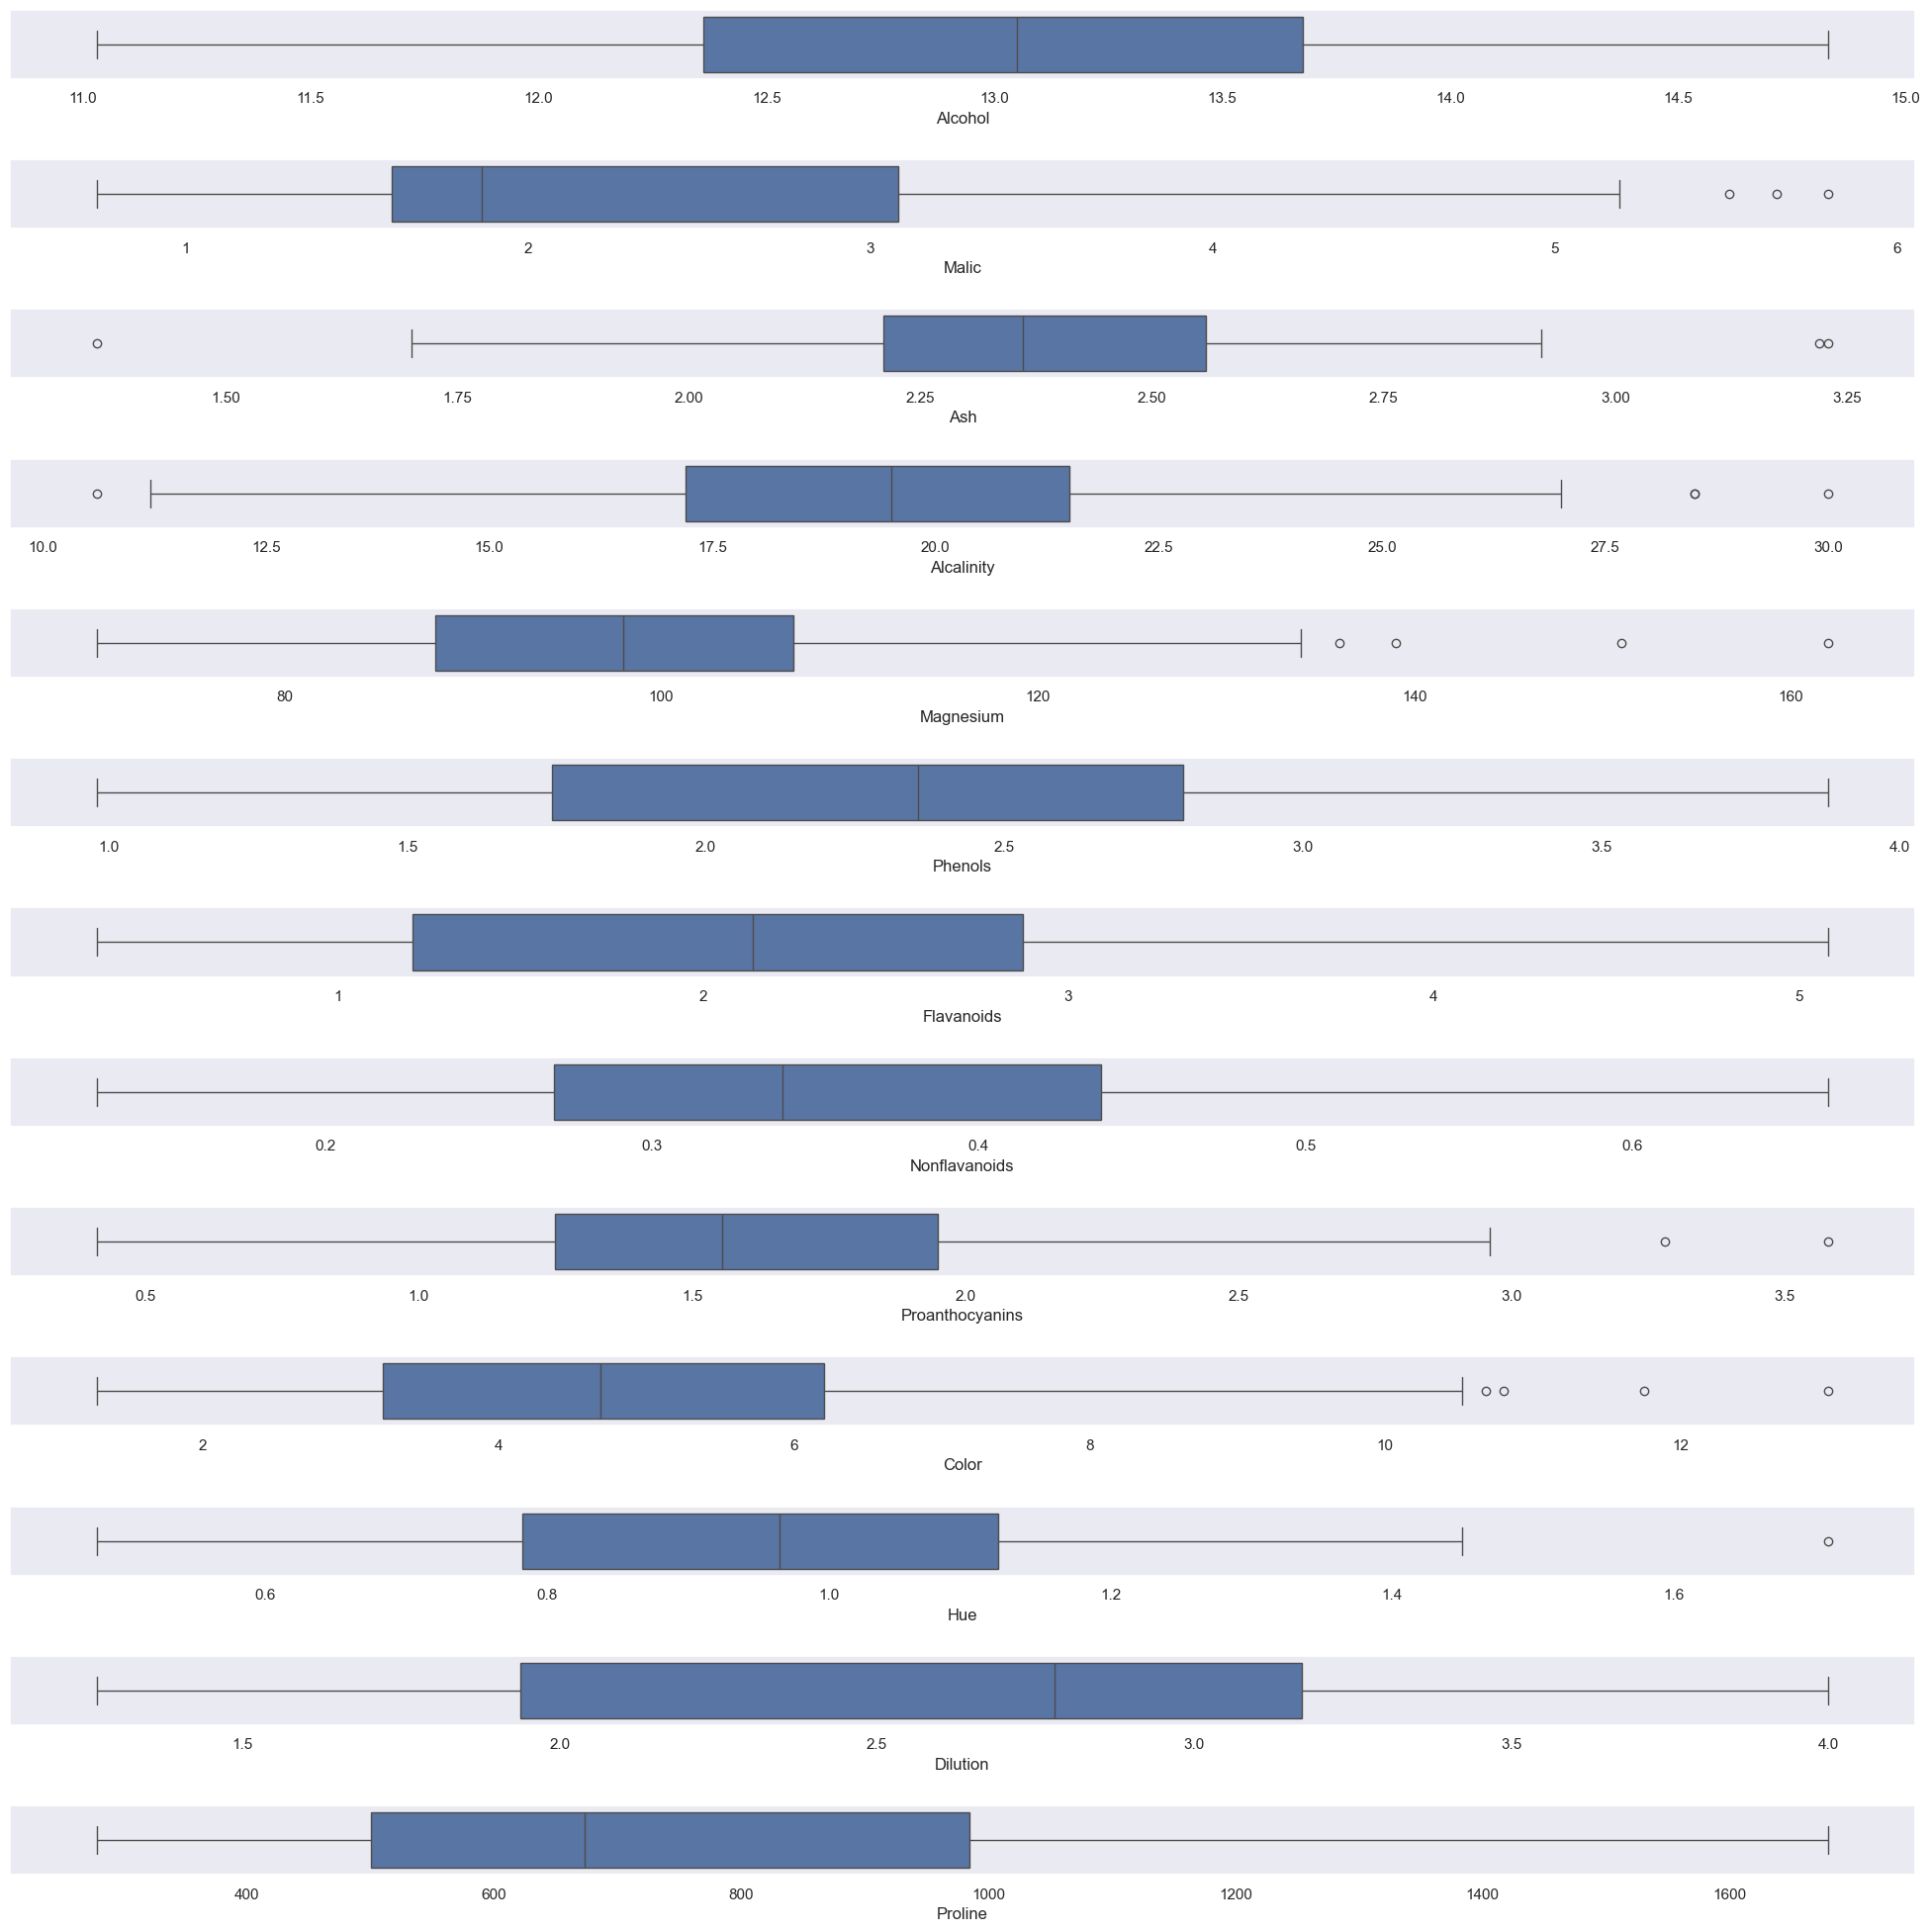

In [23]:
fig, axes = plt.subplots(13, 1, figsize = (20,20), sharex = False, sharey = False)

n = 0
for i in col_names:
    sns.boxplot(x = i, data = X, ax = axes[n])
    n+=1
plt.tight_layout(pad = 2.0)

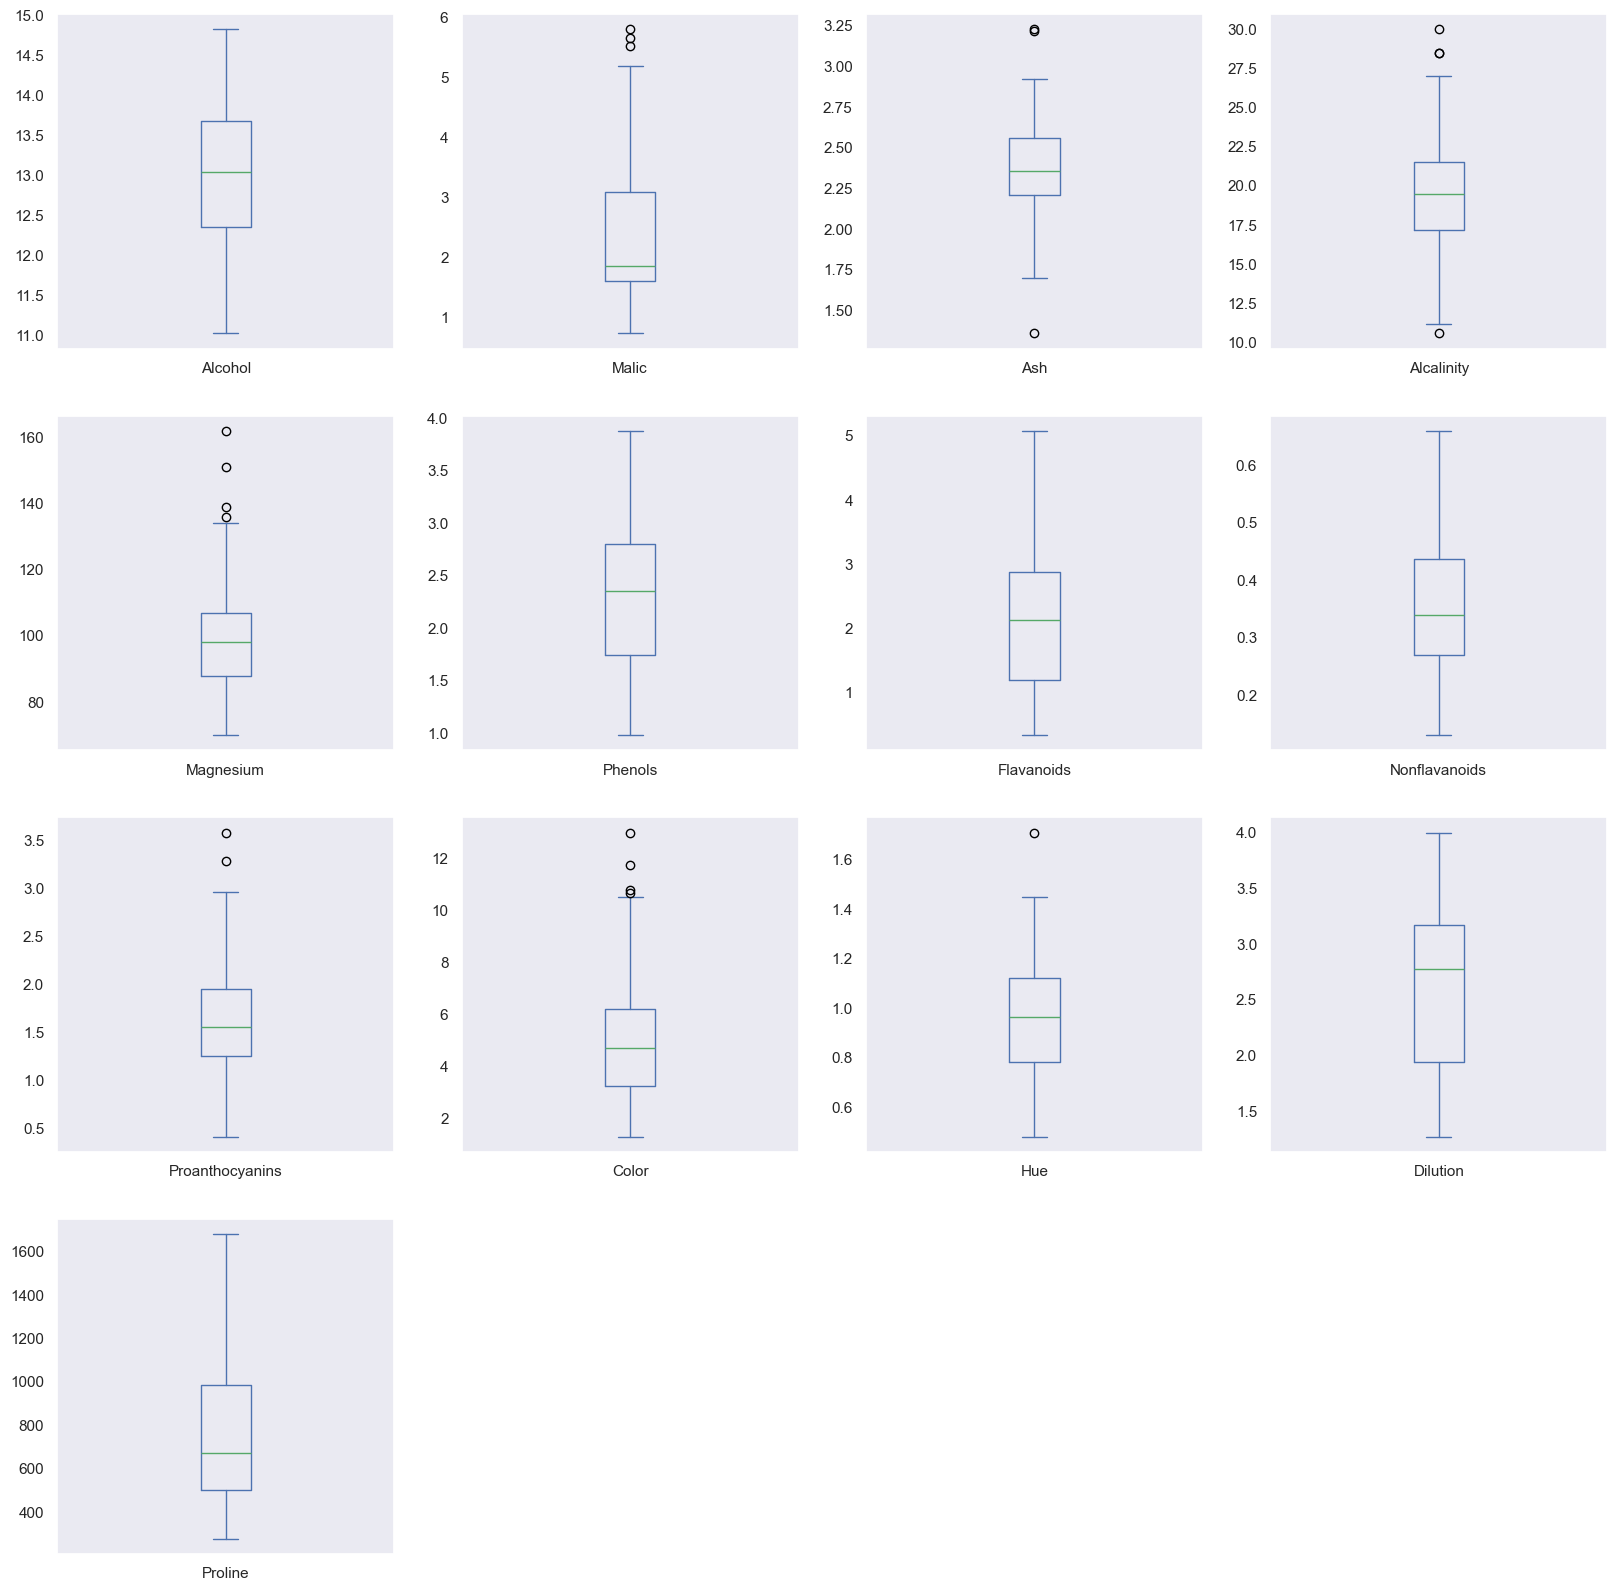

In [24]:
X.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False)
plt.show()

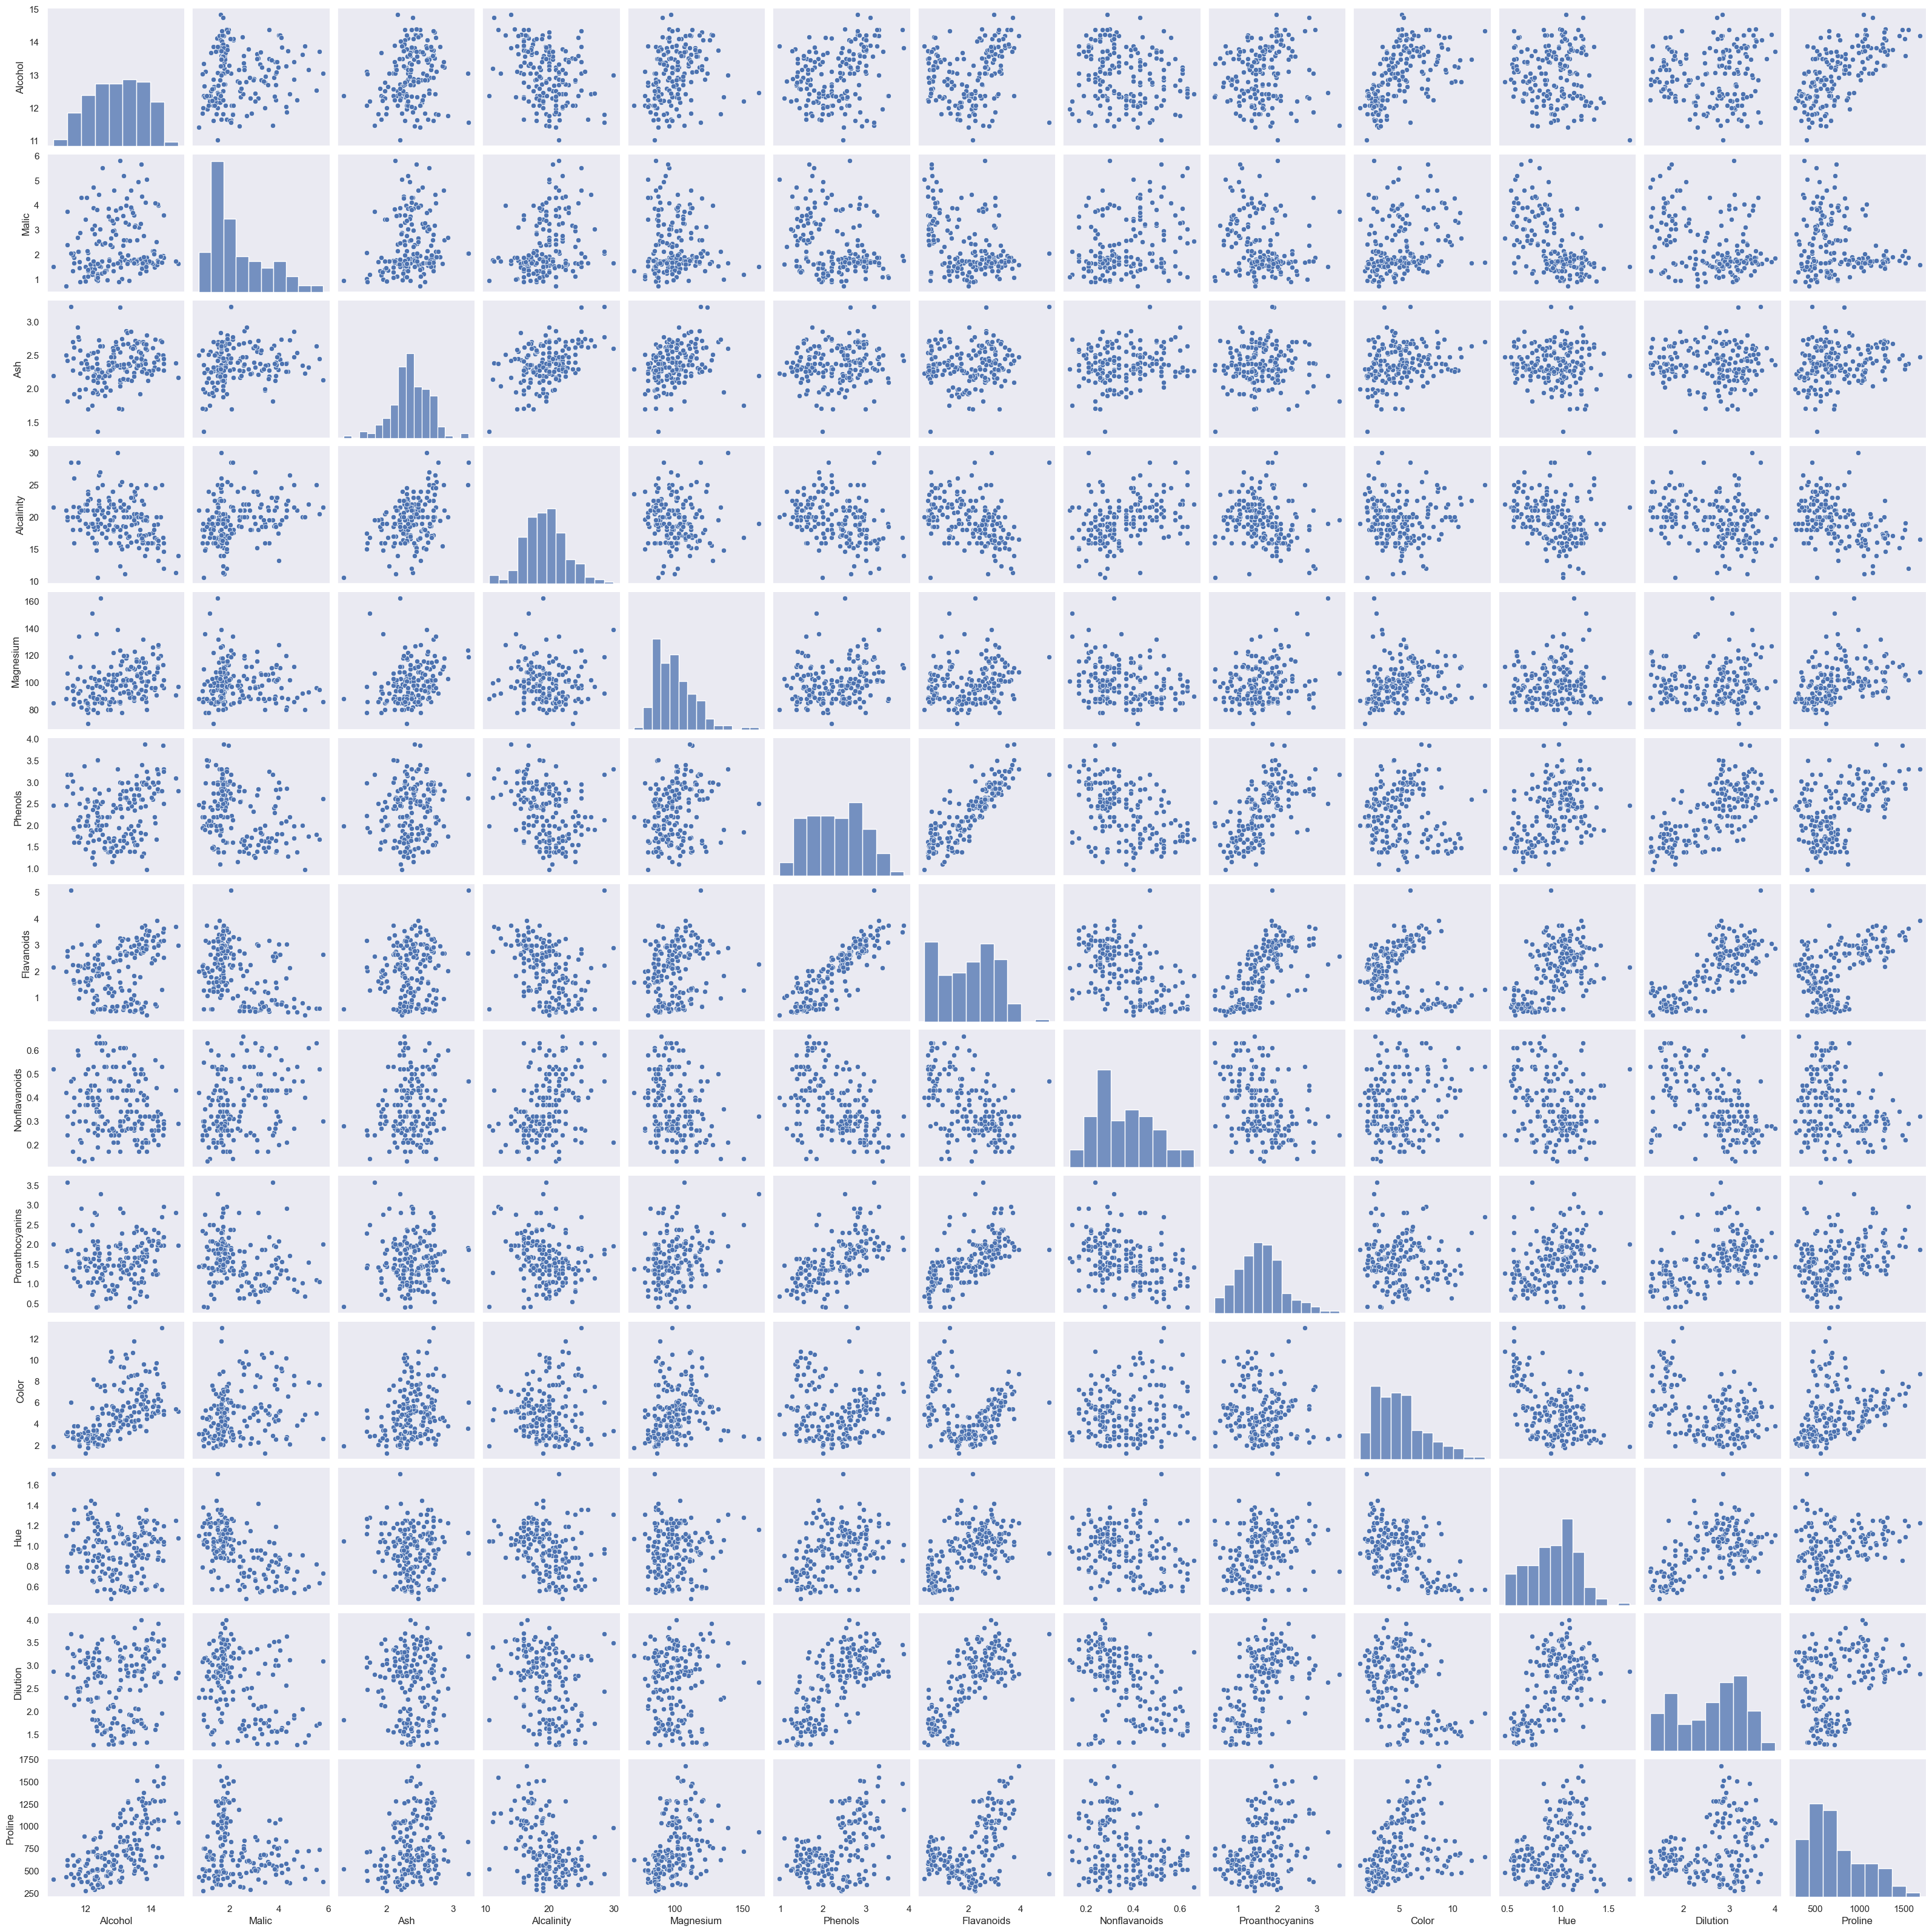

In [25]:
sns.pairplot(X)

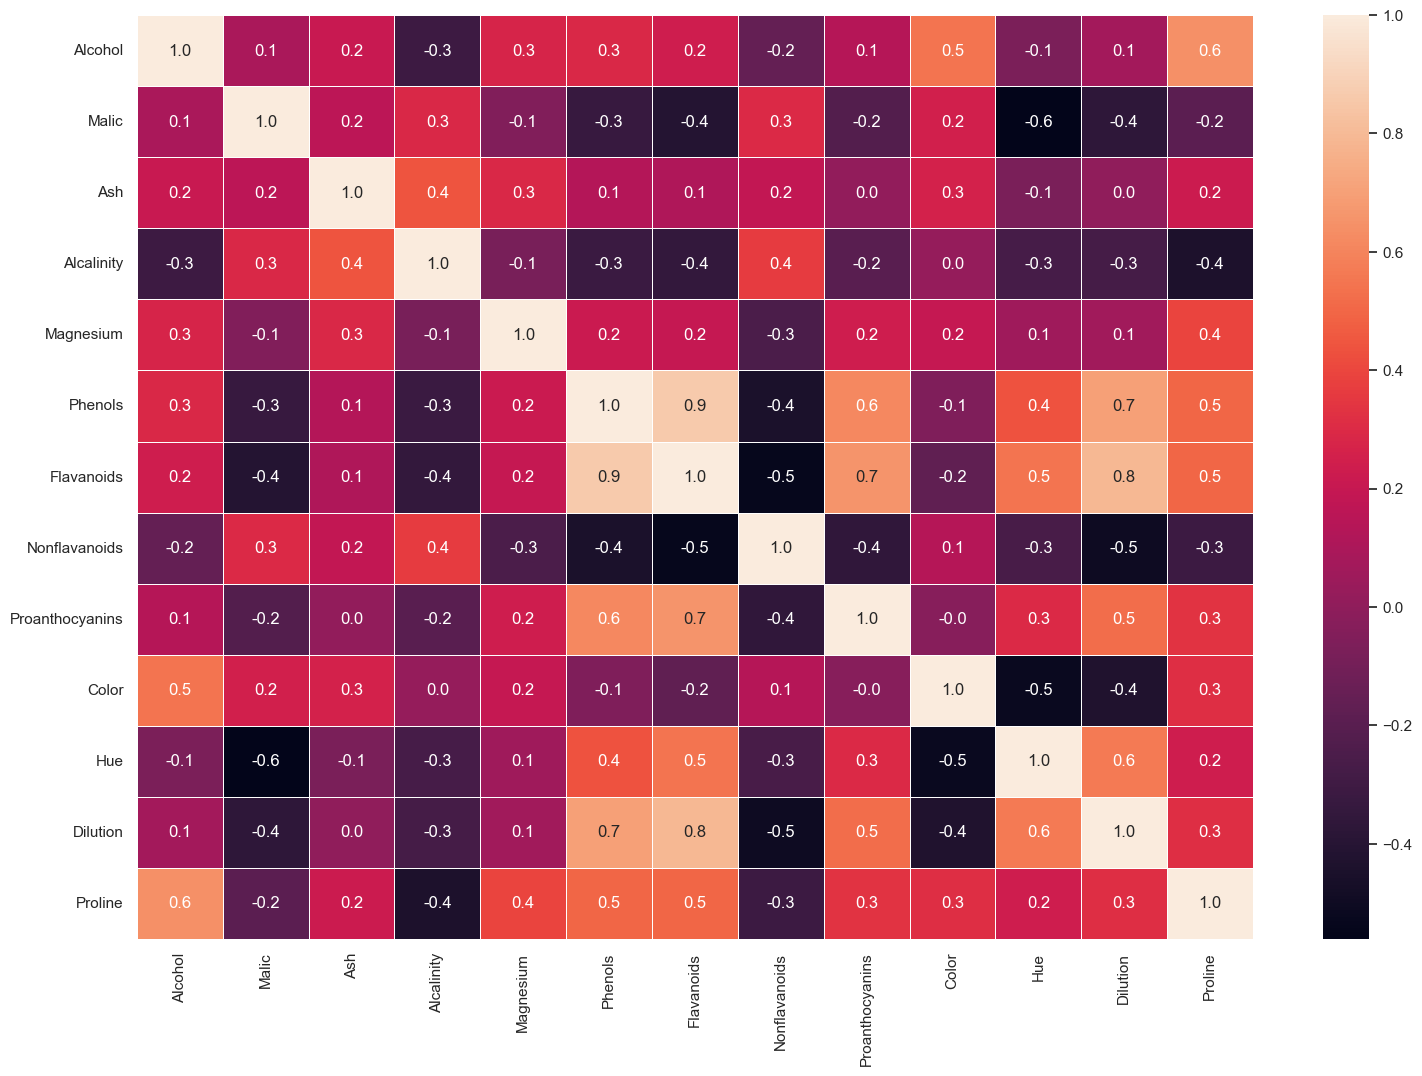

In [26]:
f, ax = plt.subplots(figsize = (18,12))
sns.heatmap(X.corr(), annot = True, lw = 0.5, fmt = '.1f', ax = ax)
plt.show()

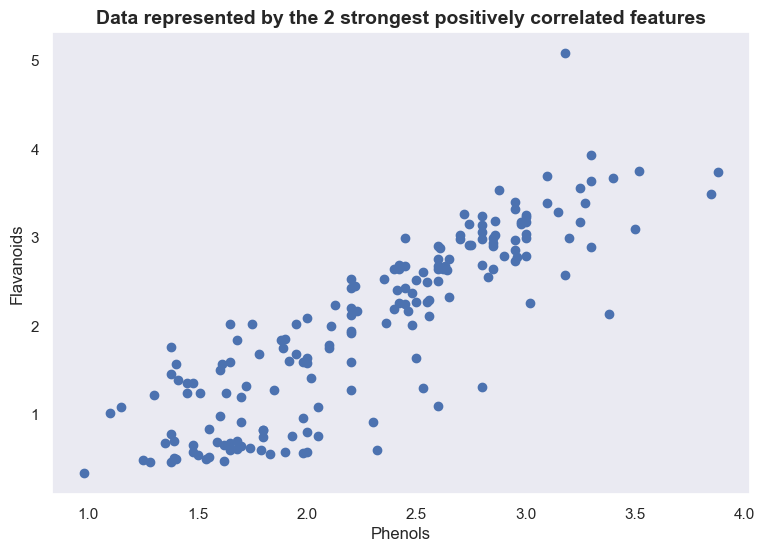

In [28]:
plt.figure(figsize = (9,6))
plt.scatter(x = X['Phenols'], y = X['Flavanoids'])
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively correlated features', fontsize = 14, fontweight = 'bold')
plt.show()

# Data Pre-processing

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Applying standard scaler on the Data

In [31]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(X)
std_df.shape

(178, 13)

## Applying MinMax Scaler on the Data

In [32]:
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(X)
minmax_df.shape

(178, 13)

# PCA

## PCA on Standard Scaled Dataset

In [33]:
from sklearn.decomposition import PCA

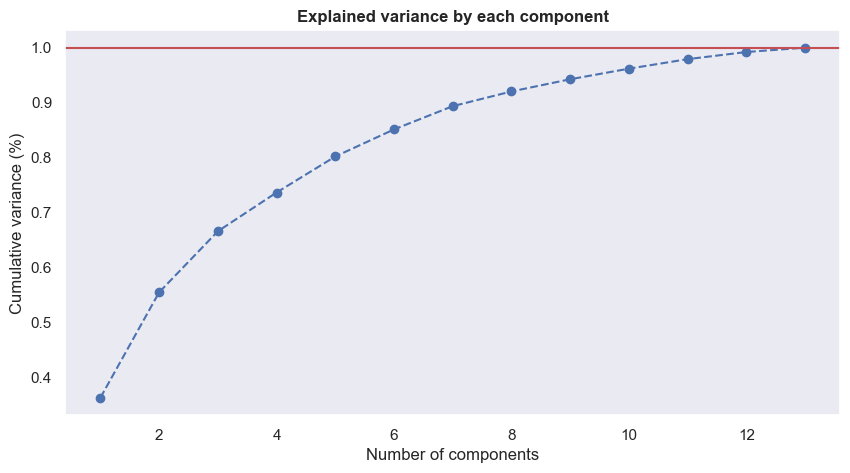

In [37]:
# pca 
pca_var = PCA()
pca_var.fit(std_df)

#plot
plt.figure(figsize = (10,5))
xi = np.arange(1, 1+std_df.shape[1], step = 1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker = 'o', linestyle = '--', color = 'b')

plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component', fontweight = 'bold')
plt.axhline(y = 1, color = 'r', linestyle = '-')

In [39]:
var = pca_var.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Text(0.5, 1.0, 'Explained variance by each component')

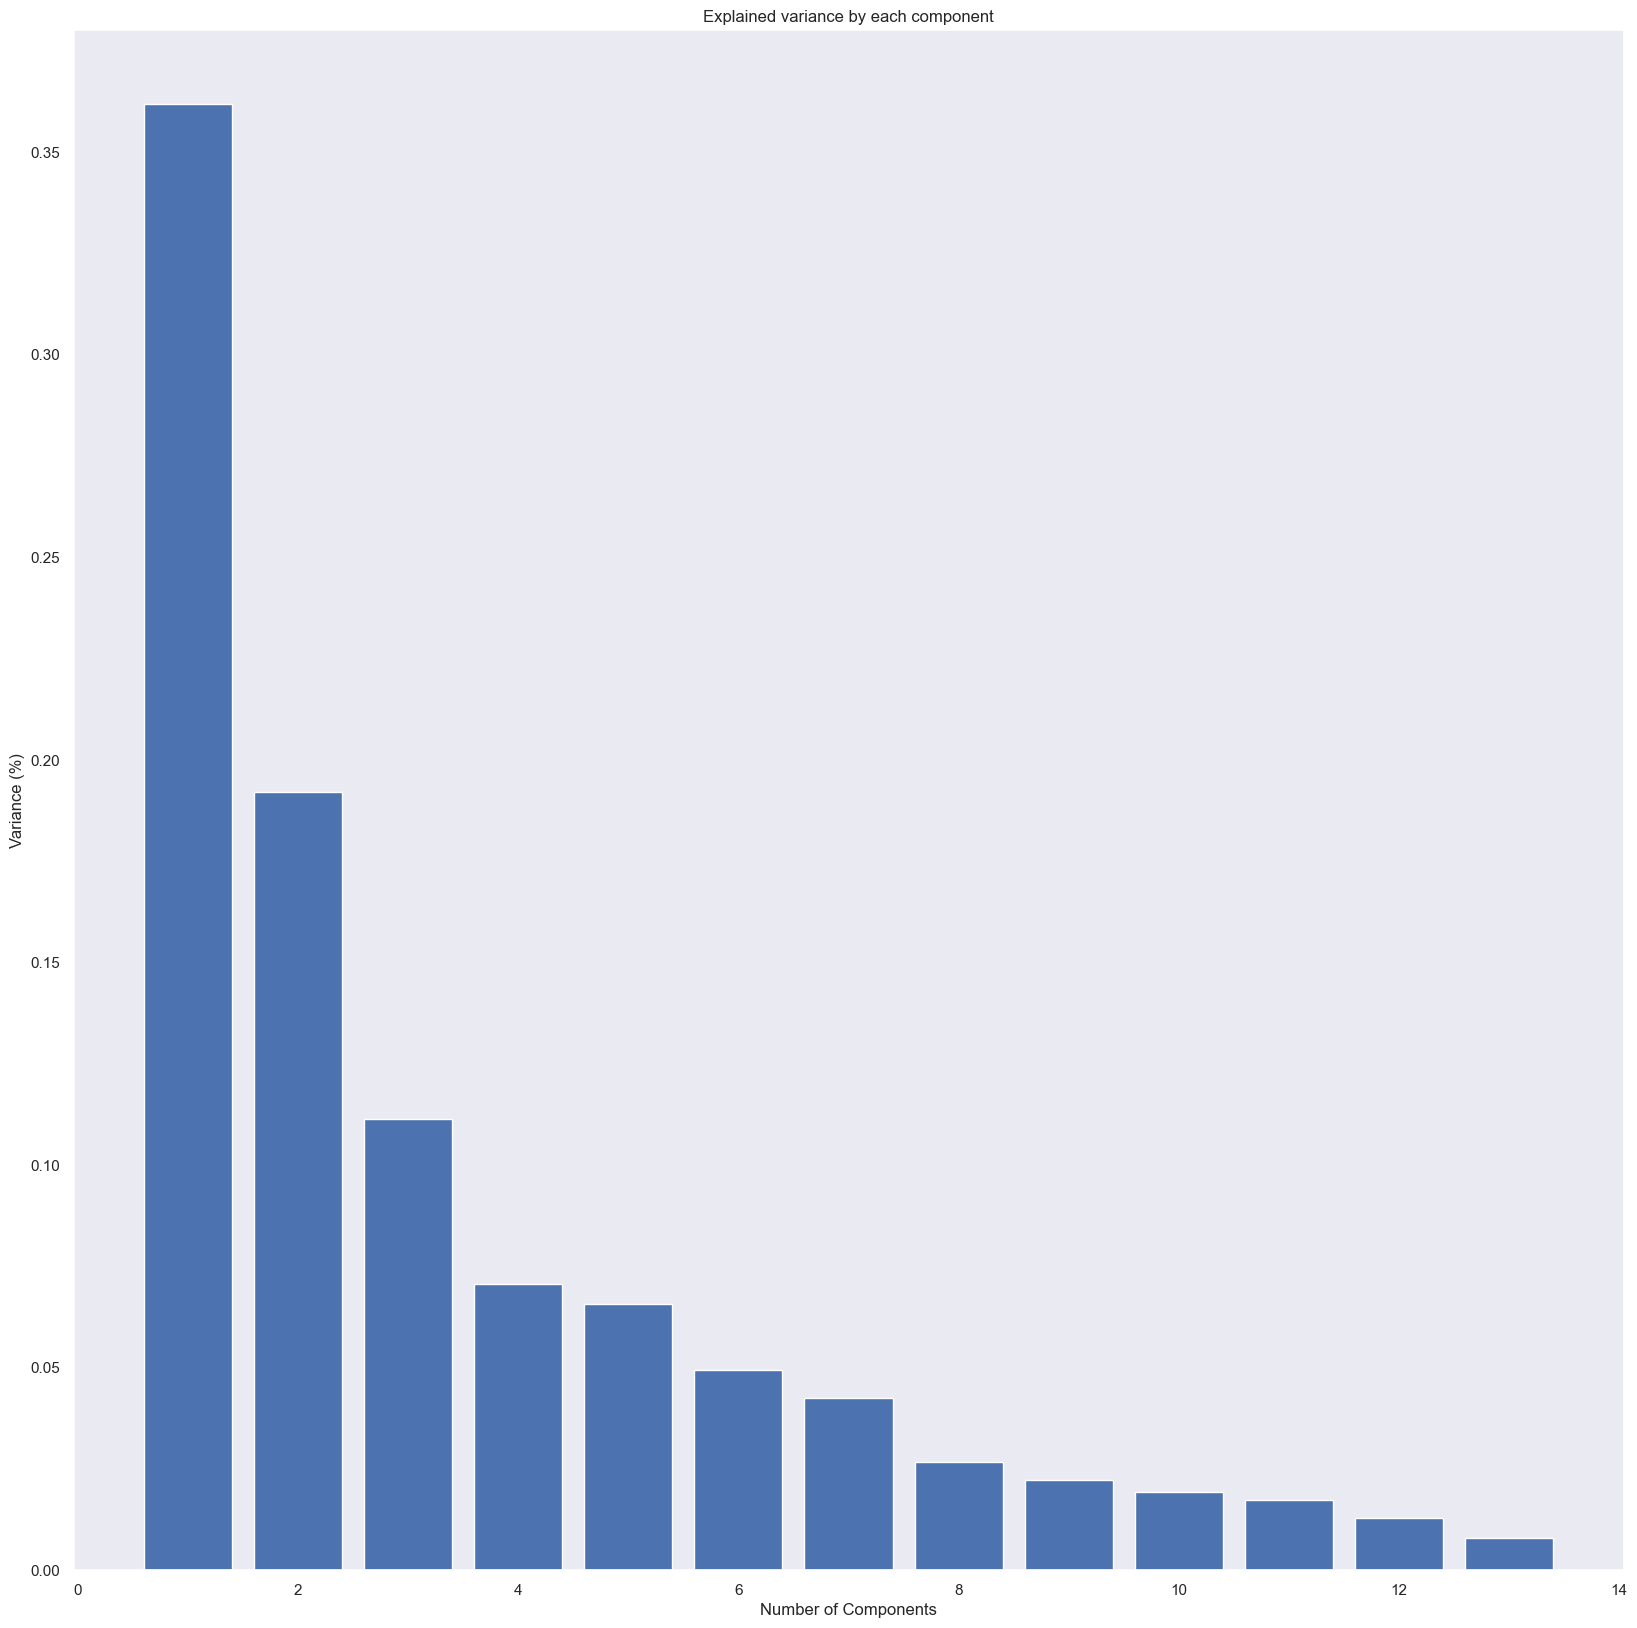

In [40]:
plt.bar(range(1, len(var)+1), var)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained variance by each component')

In [41]:
var1 = np.cumsum(np.round(var, decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [44]:
pca = PCA(n_components = 3)
pca_std = pca.fit_transform(std_df)

pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1','PC2','PC3']) 

print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

### PCA plot in 2D

Text(0, 0.5, 'PC2')

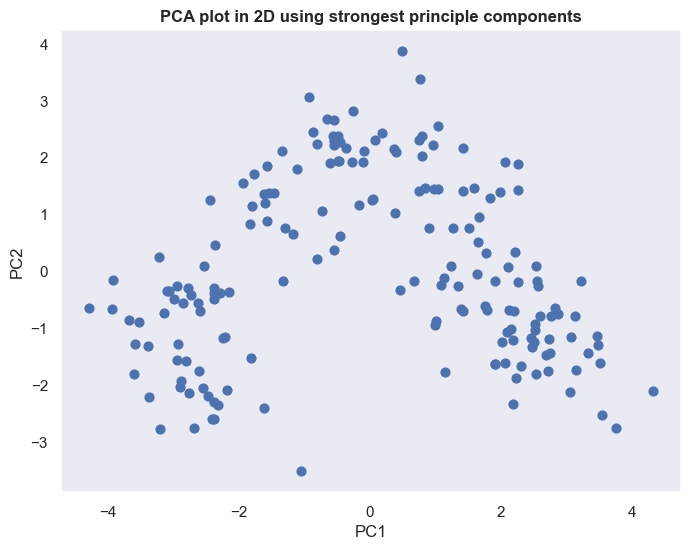

In [45]:
plt.figure(figsize = (8,6))

plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s = 40)
plt.title('PCA plot in 2D using strongest principle components', fontweight = 'bold')
plt.xlabel('PC1')
plt.ylabel('PC2')

## PCA on MinMax Scaled Data

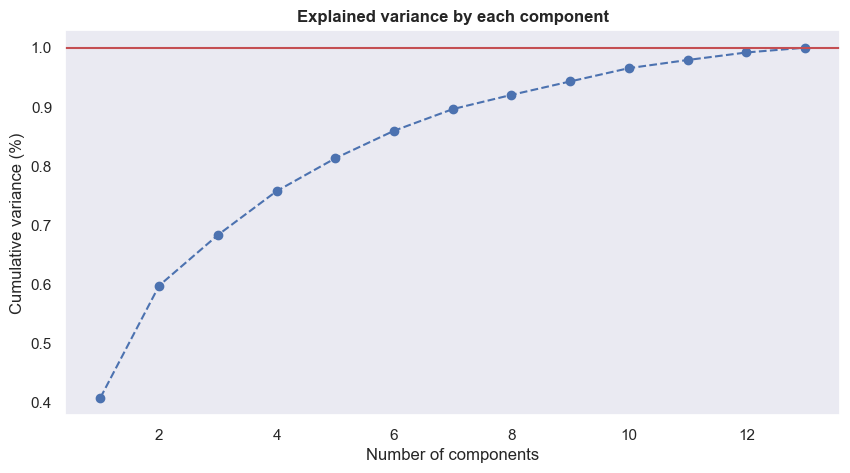

In [46]:
pca_var = PCA()
pca_var.fit(minmax_df)

plt.figure(figsize =(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step = 1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker = 'o', linestyle = '--', color = 'b')

plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component', fontweight = 'bold')
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.show()

In [47]:
var = pca_var.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

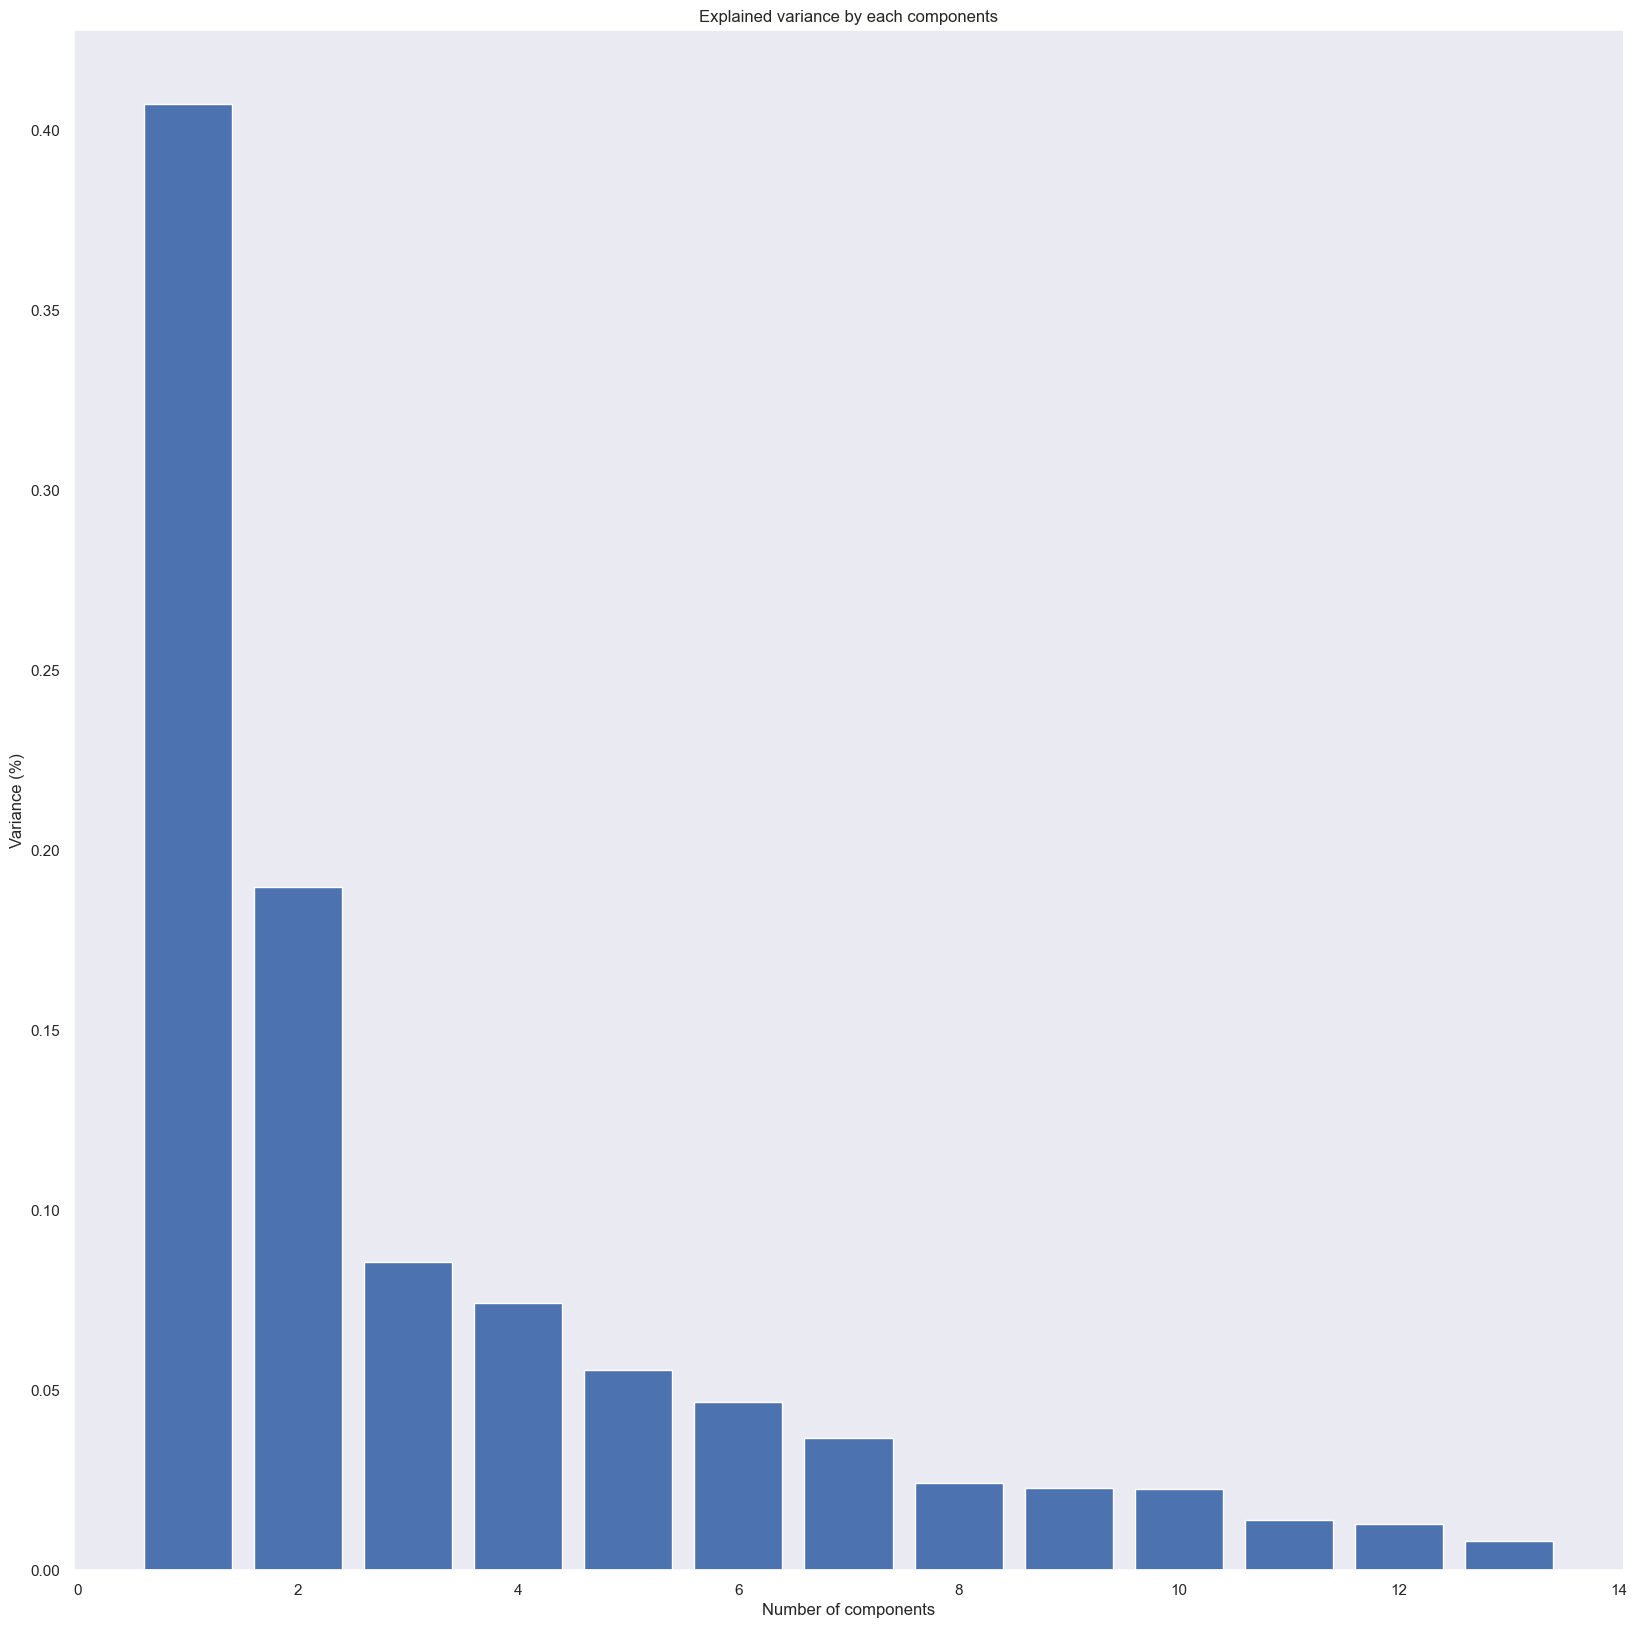

In [48]:
plt.bar(range(1, len(var)+1), var)
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')
plt.title('Explained variance by each components')
plt.show()

In [49]:
var1 = np.cumsum(np.round(var, decimals = 4)*100)
var1

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

In [50]:
#pca
pca = PCA(n_components =3)
pca_minmax = pca.fit_transform(minmax_df)

pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1','PC2','PC3'])

print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0 -0.706336 -0.253193  0.024093
1 -0.484977 -0.008823 -0.280482
2 -0.521172 -0.189187  0.196217
3 -0.821644 -0.580906  0.081110
4 -0.202546 -0.059467  0.300240

### PCA plot in 2D

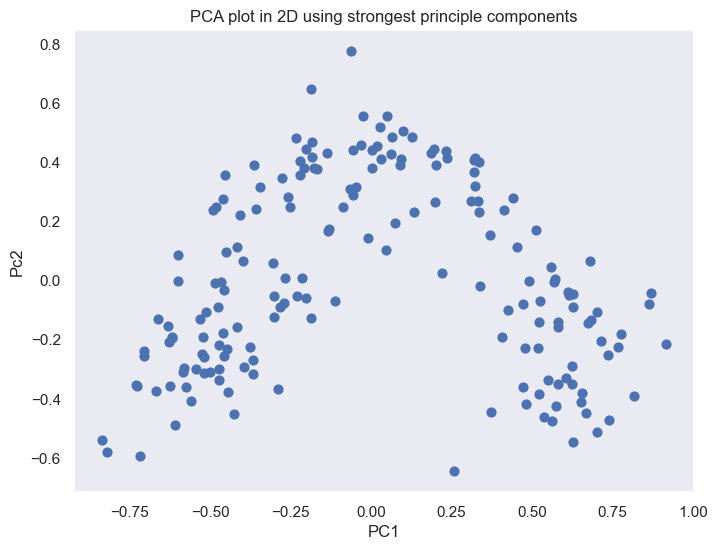

In [51]:
plt.figure(figsize = (8,6))

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s= 40)

plt.title('PCA plot in 2D using strongest principle components')
plt.xlabel('PC1')
plt.ylabel('Pc2')
plt.show()

# KMeans Clustering

In [52]:
from sklearn.cluster import KMeans

## Elbow method for determining cluster amount on PCA stnadard scaled dataset

In [54]:
inertia = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init = 15, 
                    max_iter = 500, 
                    random_state = 17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

In [58]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [61]:
silhouette = {}

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init = 15, 
                    max_iter = 500,
                    random_state = 17)
    kmeans.fit(pca_std_df)
    silhouette[i] = silhouette_score(pca_std_df, kmeans.labels_, metric = 'euclidean')

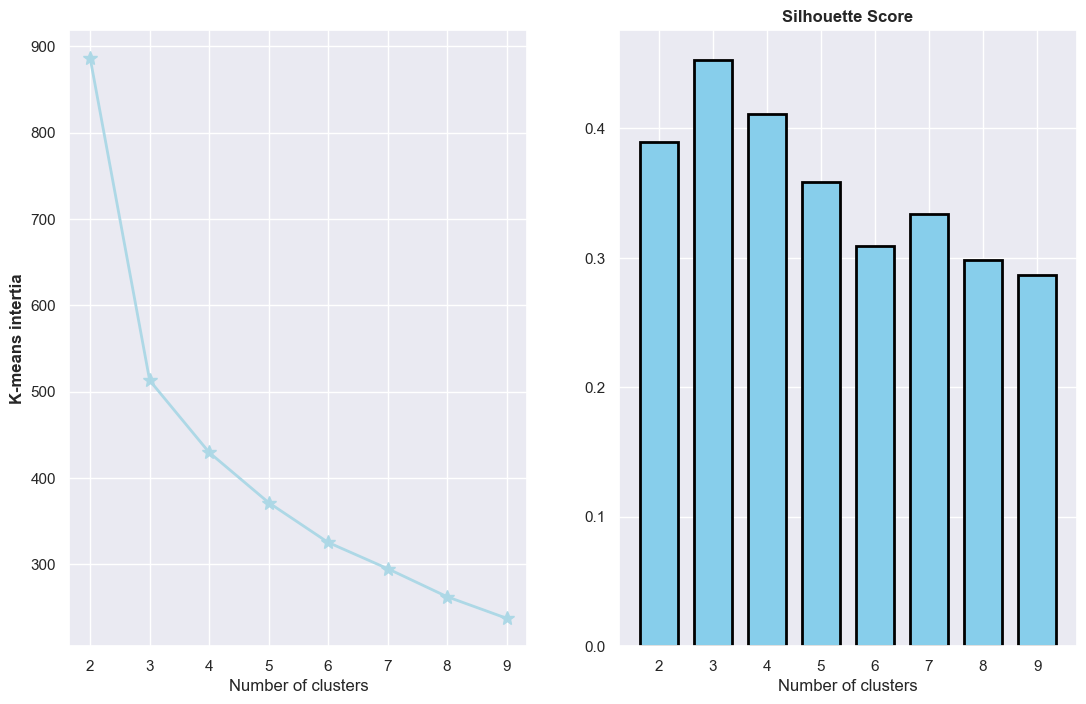

In [66]:
sns.set(style = 'darkgrid', rc = {'figure.figsize':(13,8)})

plt.subplot(1,2,1)
plt.plot(range(2, len(inertia) + 2), inertia, marker = '*', lw = 2, color = 'lightblue', ms = 10)
plt.xlabel('Number of clusters')
plt.ylabel('K-means intertia', fontweight = 'bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

## Silhouette Score

In [67]:
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters = n, init = 'k-means++').fit(pca_std_df)
    clusters_inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_std_df, kmeans.labels_)
    s_scores.append(silhouette_avg)

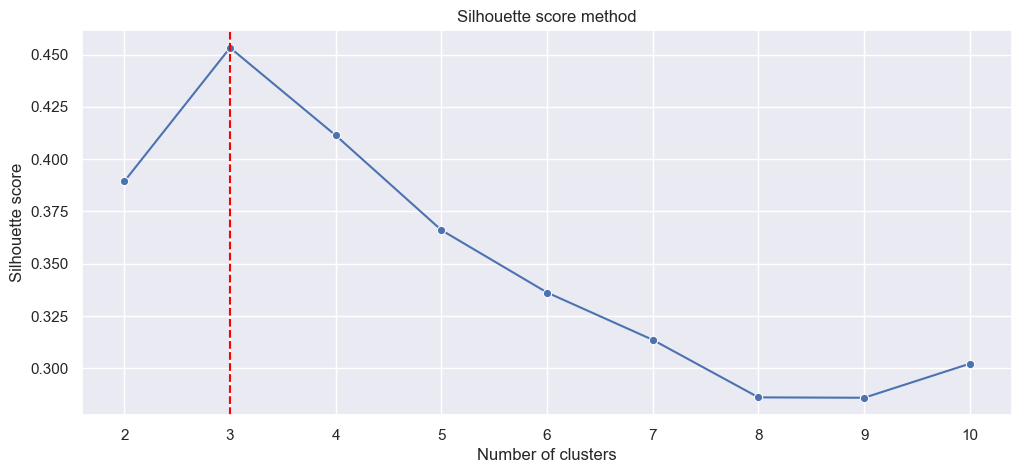

In [70]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot(x = n_clusters, y = s_scores, marker = 'o', ax = ax)
ax.set_title('Silhouette score method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.axvline(3, ls = '--', c = 'red')
plt.show()

__Silhouette score method indicates the best options would be 3 clusters__

In [71]:
from yellowbrick.cluster import KElbowVisualizer

Elbow plot for standard scaler data


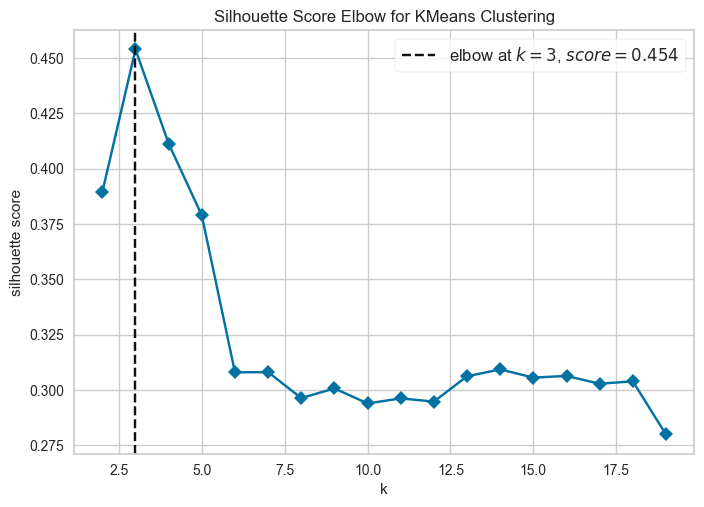

In [72]:
model = KMeans(random_state = 0, max_iter = 500, init = 'k-means++')

visualizer = KElbowVisualizer(model, k = (2, 20), metric = 'silhouette', timings = False)
print('Elbow plot for standard scaler data')
visualizer.fit(pca_std_df)
visualizer.show()
plt.show()

For n_clusters =  2 the average silhouette_score is:  0.38938813089003294
For n_clusters =  3 the average silhouette_score is:  0.4537999848257617
For n_clusters =  4 the average silhouette_score is:  0.4113050656681102
For n_clusters =  5 the average silhouette_score is:  0.37881272120277343
For n_clusters =  6 the average silhouette_score is:  0.30793358557030553
For n_clusters =  7 the average silhouette_score is:  0.30802581590159767


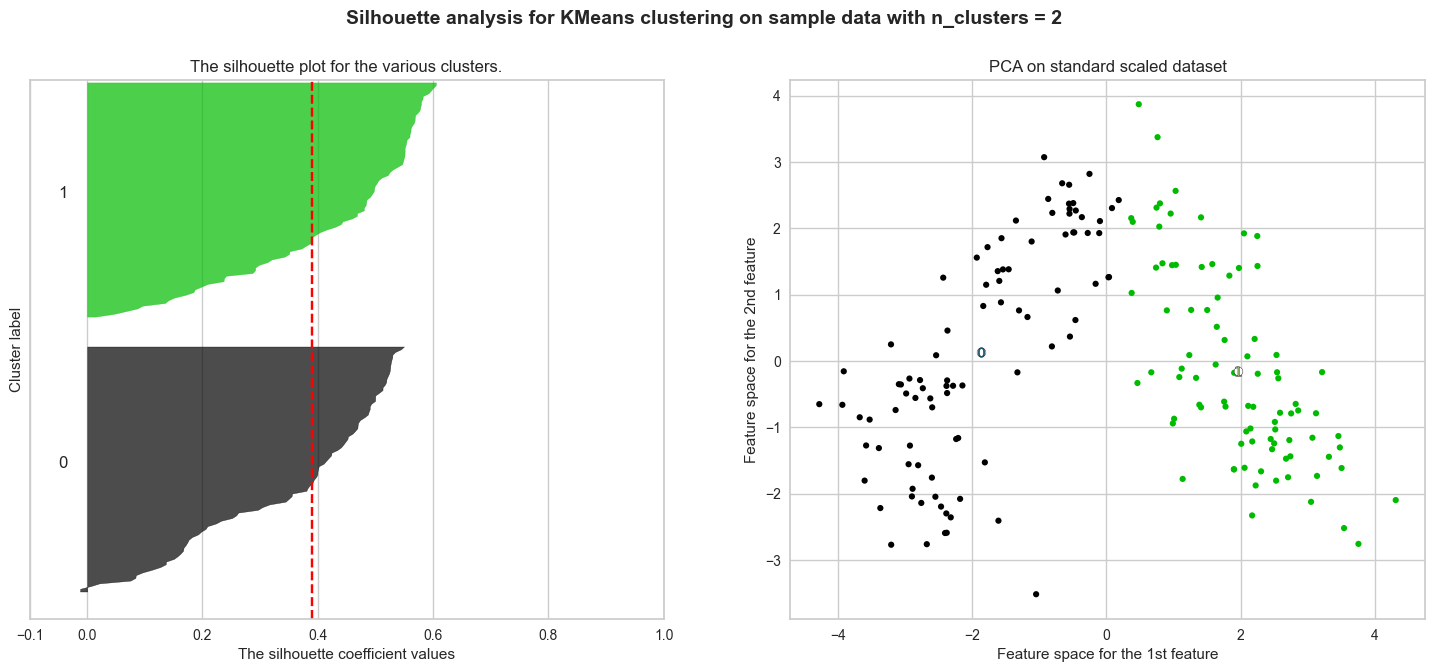

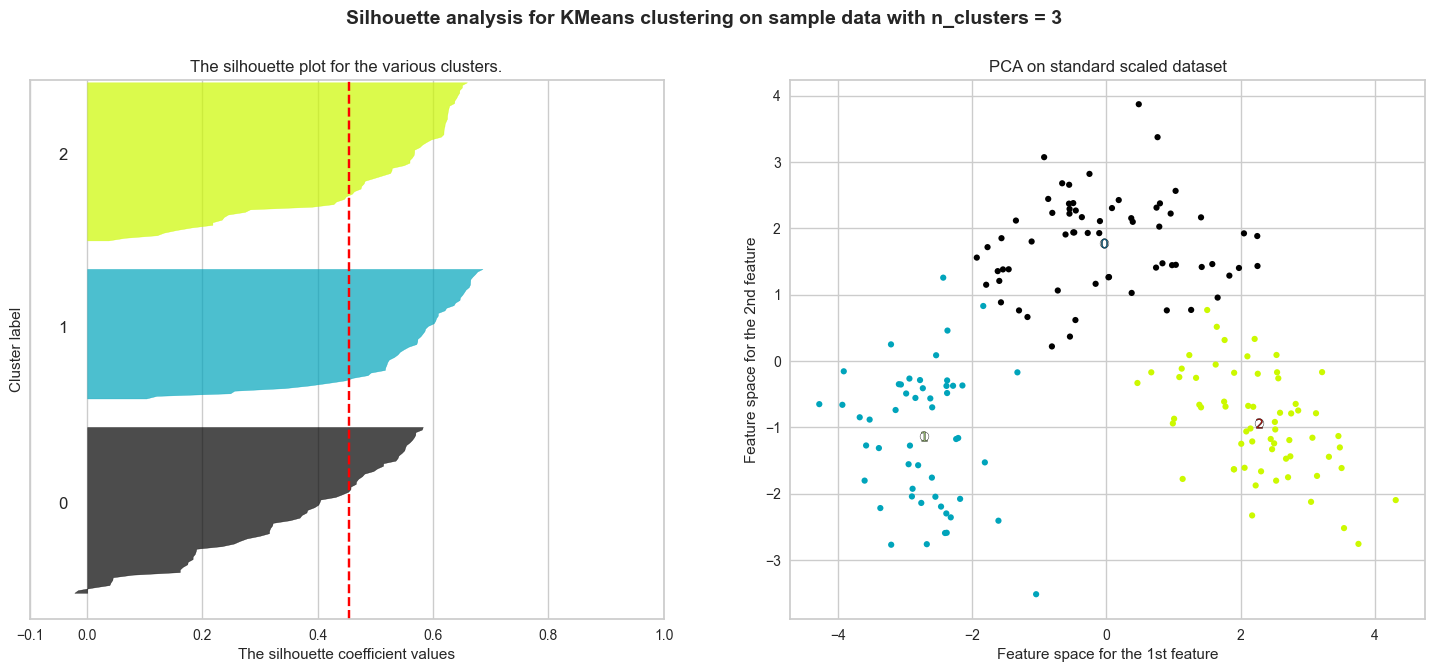

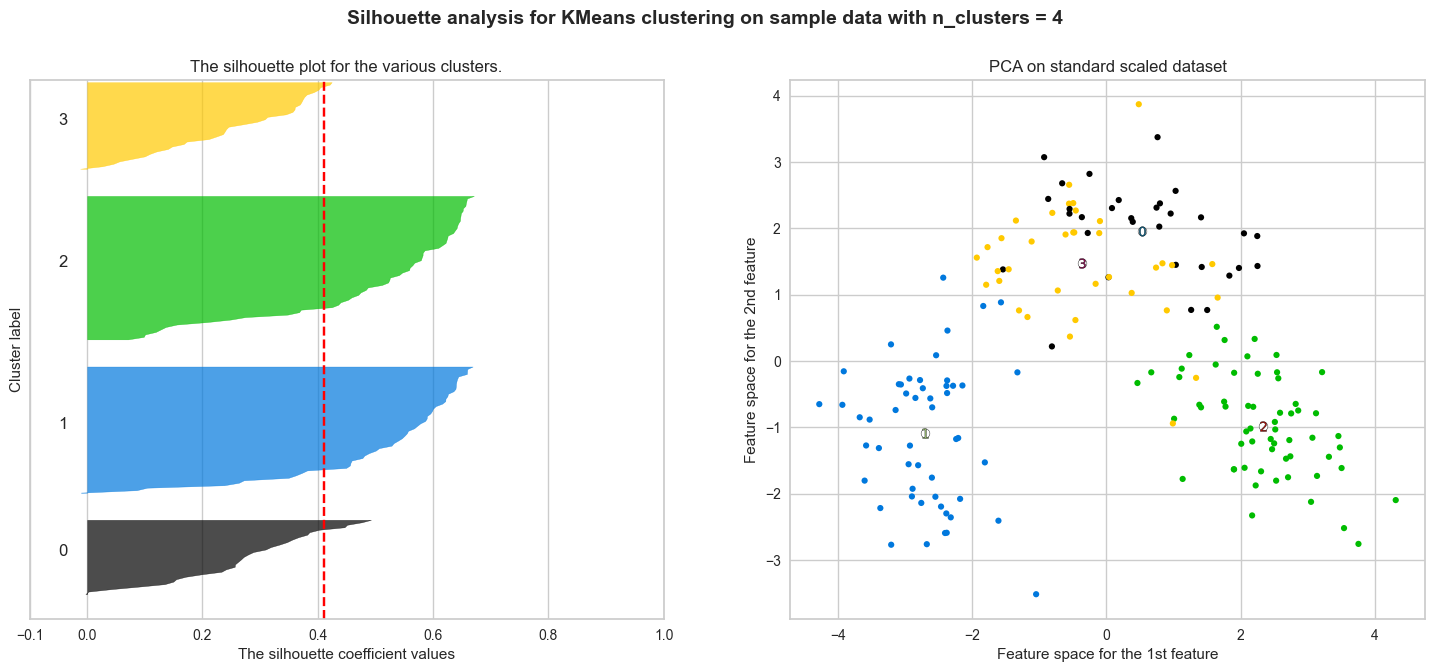

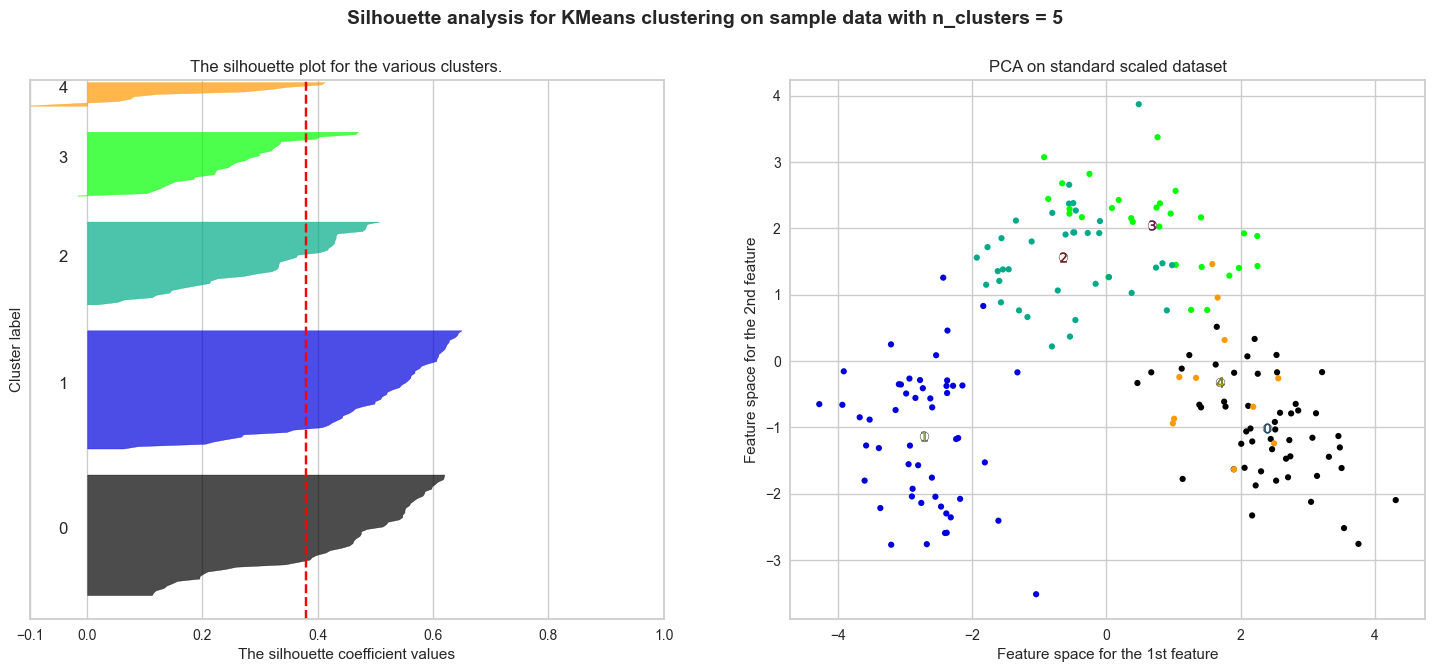

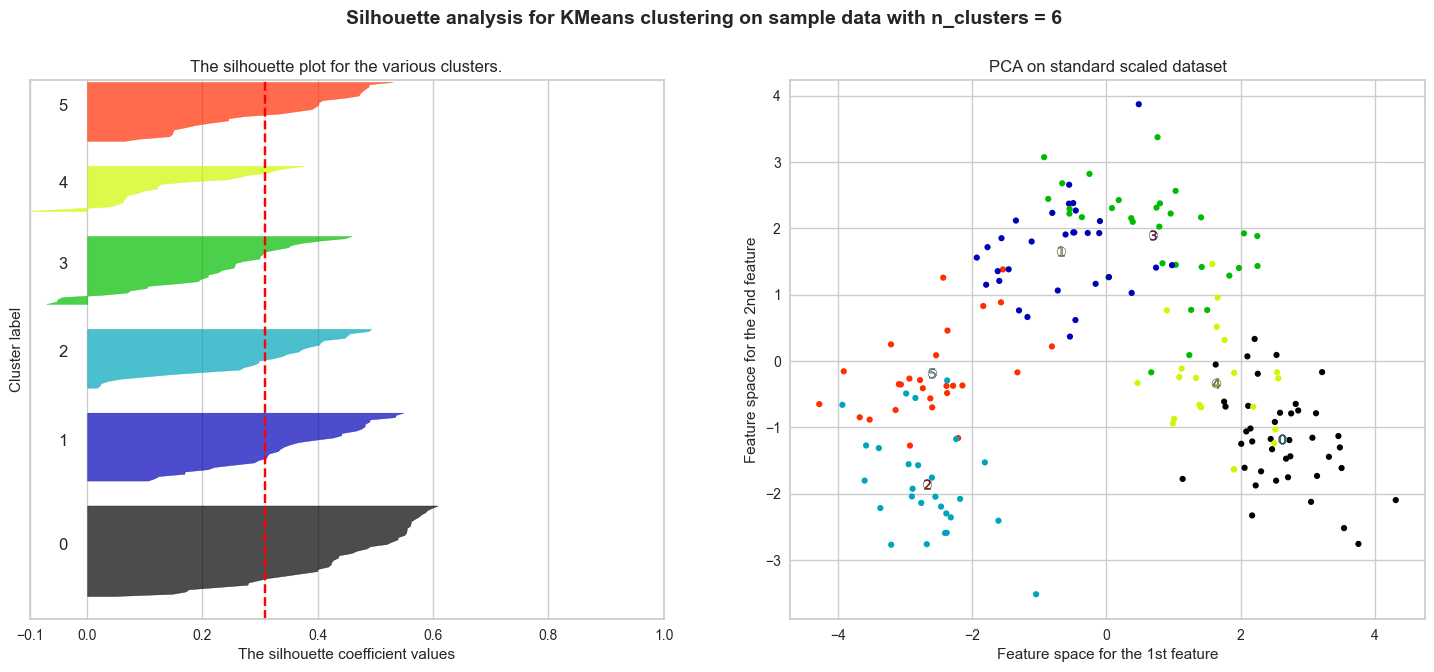

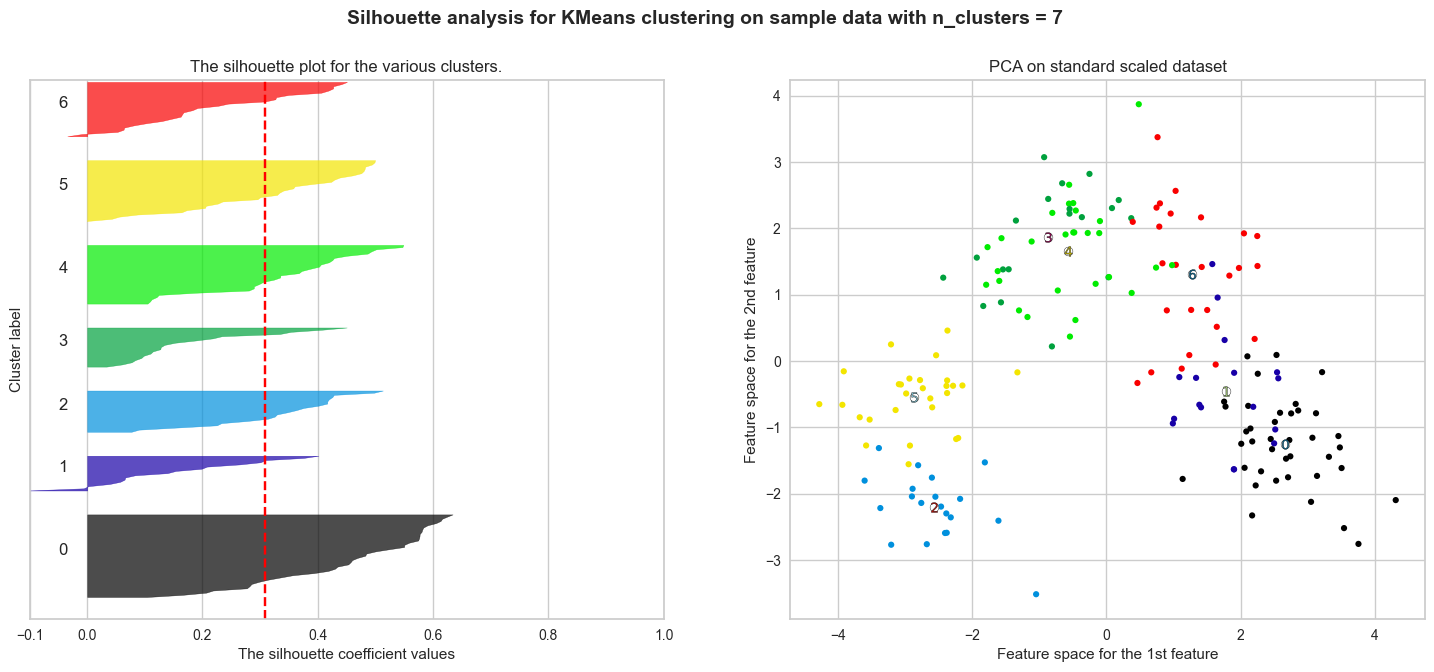

In [82]:
n_clusters = range(2,8)

for n in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(pca_std_df) + (n) * 10])

    kmeans = KMeans(n_clusters = n, random_state = 0)
    cluster_labels = kmeans.fit_predict(pca_std_df)

    silhouette_avg = silhouette_score(pca_std_df, cluster_labels)
    print('For n_clusters = ', n, 'the average silhouette_score is: ', silhouette_avg)

    sample_silhouette_values = silhouette_samples(pca_std_df, cluster_labels)

    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels ==i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                ith_cluster_silhouette_values,
                facecolor = color, edgecolor = color, alpha = 0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    ax1.axvline(x = silhouette_avg, color = 'red', linestyle ='--')

    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

    #2nd plot 
    color = cm.nipy_spectral(cluster_labels.astype(float)/n)
    ax2.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], marker = 'o', s = 20, lw = 0,
                c = color, edgecolor = 'k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker  = 'o', 
                c = 'white', alpha = 1, s = 40, edgecolor = 'k')


    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1], marker = '$%d$' % i , alpha = 1,
                    s = 50, edgecolor = 'k')


    ax2.set_title('PCA on standard scaled dataset')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')

plt.show()

__Conclusion:__

As per the silouette score, the ideal number of clusters is 3, with a score higher than the other options.

## Building KMeans cluster with k = 3 on PCA and Standardised data

In [84]:
model = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++')
y_pred = model.fit_predict(pca_std_df)
y_pred.shape

(178,)

In [85]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [86]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [87]:
model.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03]])

In [88]:
model.inertia_

513.0564645910771

In [89]:
data['Kmeans_std'] = model.labels_

In [90]:
data.groupby('Kmeans_std').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                mean       mean      mean      mean       mean        mean   
Kmeans_std                                                                   
0           2.000000  12.250923  1.897385  2.231231  20.063077   92.738462   
1           2.941176  13.134118  3.307255  2.417647  21.241176   98.666667   
2           1.048387  13.676774  1.997903  2.466290  17.462903  107.967742   

             Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                mean       mean          mean            mean      mean   
Kmeans_std                                                                
0           2.247692   2.050000      0.357692        1.624154  2.973077   
1           1.683922   0.818824      0.451961        1.145882  7.234706   
2           2.847581   3.003226      0.292097        1.922097  5.453548   

                 Hue  Dilution      Proline  
                mean      mean         mean  
Kmeans_std                                   
0           1.062708  2.803385   510.169231  
1           0.691961  1.696667   619.058824  
2           1.065484  3.163387  1100.225806

In [92]:
from yellowbrick.cluster import SilhouetteVisualizer as sv

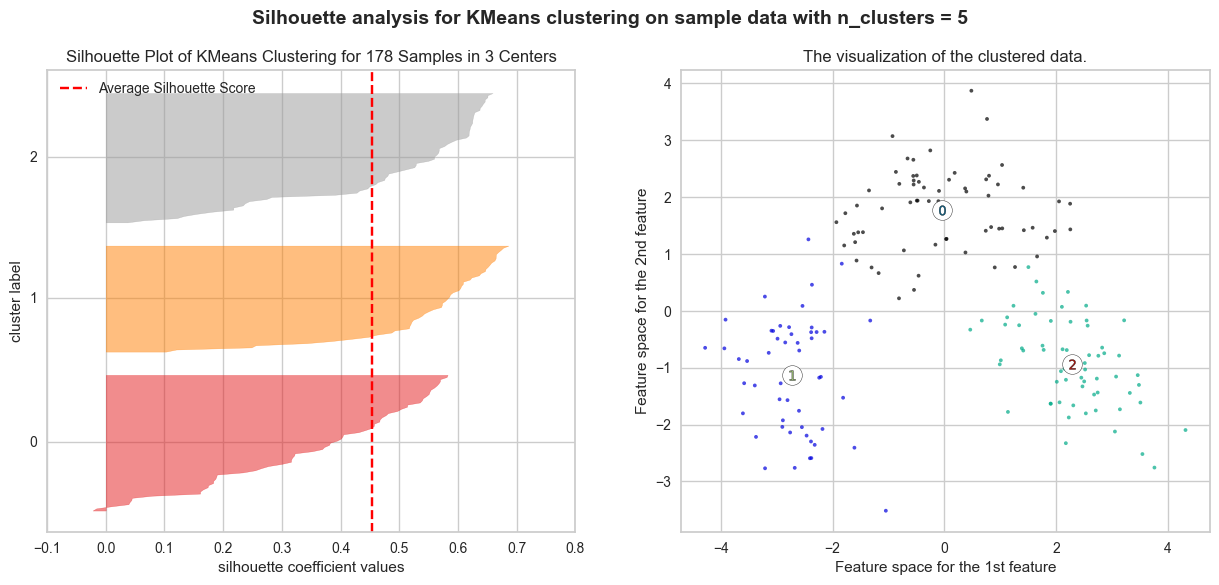

In [96]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey = False)
fig.set_size_inches(15,6)

sil_vis1 = sv(model, ax = ax1)
sil_vis1.fit(pca_std_df)

color = cm.nipy_spectral(model.labels_.astype(float)/ 5)
ax2.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], marker = '.', s = 30, lw = 0, alpha = 0.7,
            c = color, edgecolor = 'k')

centers1 = model.cluster_centers_

ax2.scatter(centers1[:,0], centers1[:,1], marker = 'o', c = 'white', alpha = 1, s = 200, edgecolor = 'k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 5),fontsize=14, fontweight='bold')

sil_vis1.show()
plt.show()

## Elbow method and silhouette score on PCA MinMax scaled data

In [97]:
inertia = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init = 15, 
                    max_iter = 500, 
                    random_state = 17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)

In [99]:
silhouette = {}

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init = 15, 
                    max_iter = 500,
                    random_state = 17)
    kmeans.fit(pca_minmax_df)
    silhouette[i] = silhouette_score(pca_std_df, kmeans.labels_, metric = 'euclidean')

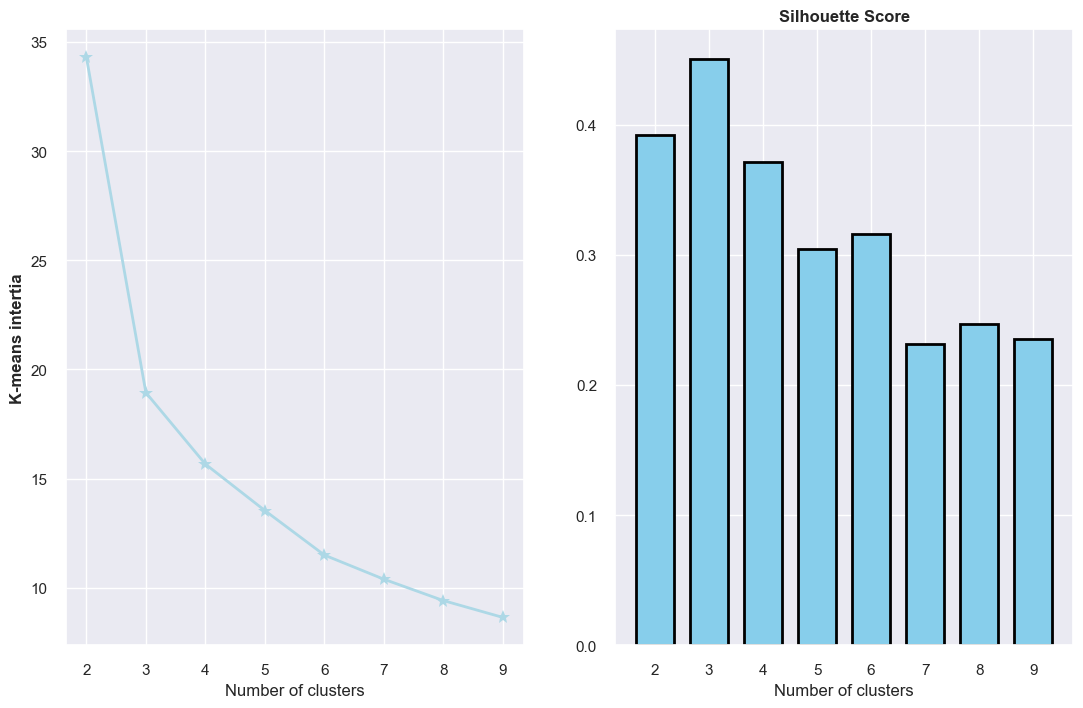

In [100]:
sns.set(style = 'darkgrid', rc = {'figure.figsize':(13,8)})

plt.subplot(1,2,1)
plt.plot(range(2, len(inertia) + 2), inertia, marker = '*', lw = 2, color = 'lightblue', ms = 10)
plt.xlabel('Number of clusters')
plt.ylabel('K-means intertia', fontweight = 'bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

In [101]:
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters = n, init = 'k-means++').fit(pca_minmax_df)
    clusters_inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_minmax_df, kmeans.labels_)
    s_scores.append(silhouette_avg)

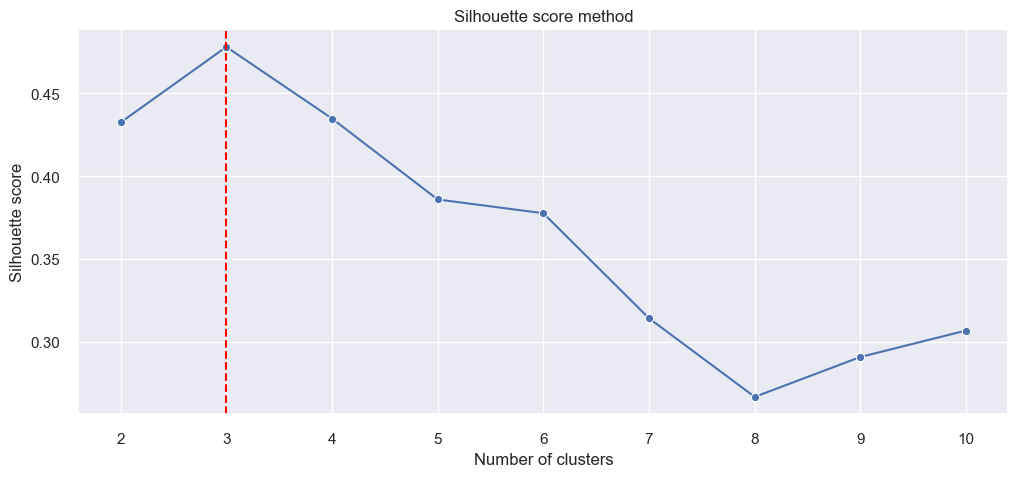

In [102]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot(x = n_clusters, y = s_scores, marker = 'o', ax = ax)
ax.set_title('Silhouette score method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.axvline(3, ls = '--', c = 'red')
plt.show()

Elbow plot for standard scaler data


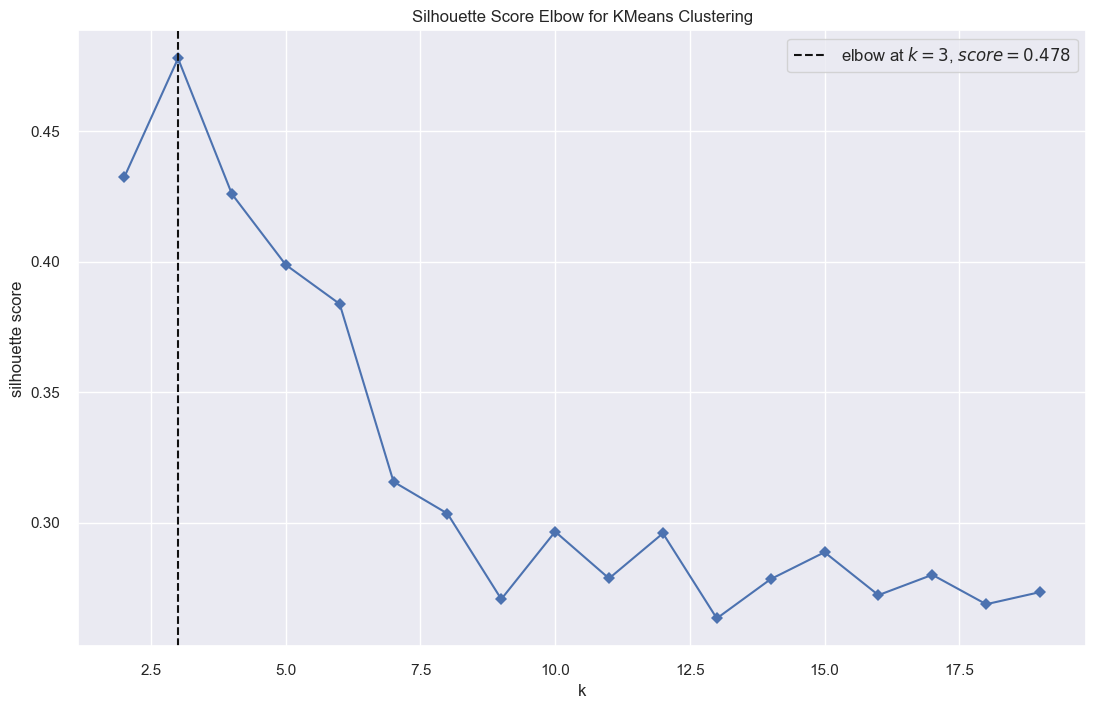

In [103]:
model = KMeans(random_state = 0, max_iter = 500, init = 'k-means++')

visualizer = KElbowVisualizer(model, k = (2, 20), metric = 'silhouette', timings = False)
print('Elbow plot for standard scaler data')
visualizer.fit(pca_minmax_df)
visualizer.show()
plt.show()

For n_clusters =  2 the average silhouette_score is:  0.43235189362905235
For n_clusters =  3 the average silhouette_score is:  0.47796626568347655
For n_clusters =  4 the average silhouette_score is:  0.4260084778800526
For n_clusters =  5 the average silhouette_score is:  0.39888218931478314
For n_clusters =  6 the average silhouette_score is:  0.3839012953547209
For n_clusters =  7 the average silhouette_score is:  0.31579634363930376


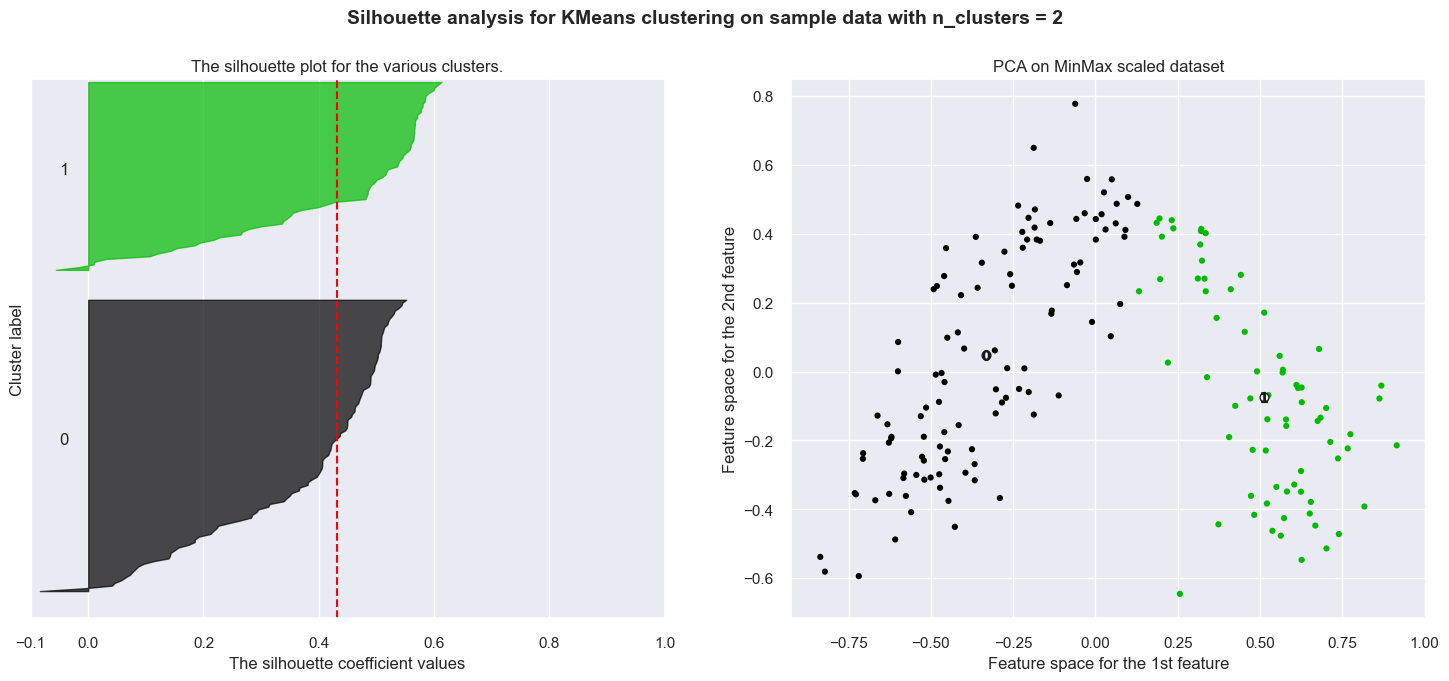

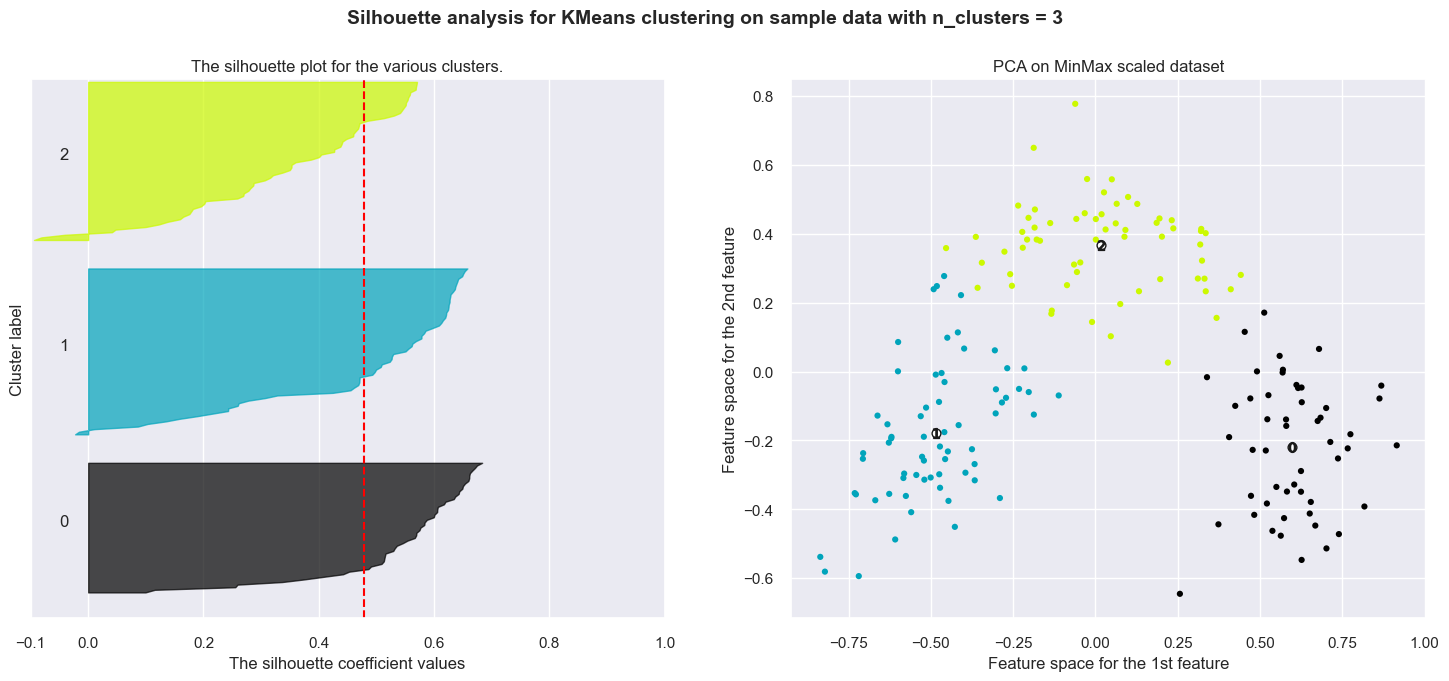

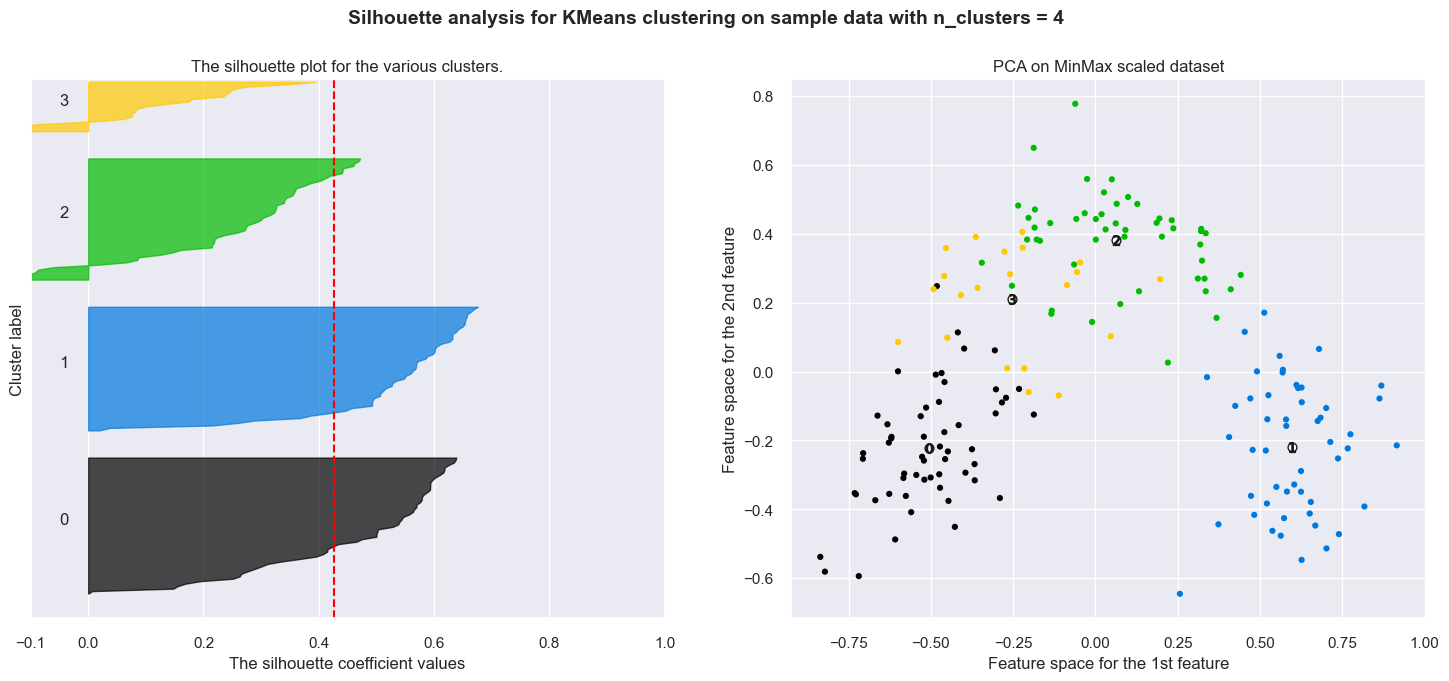

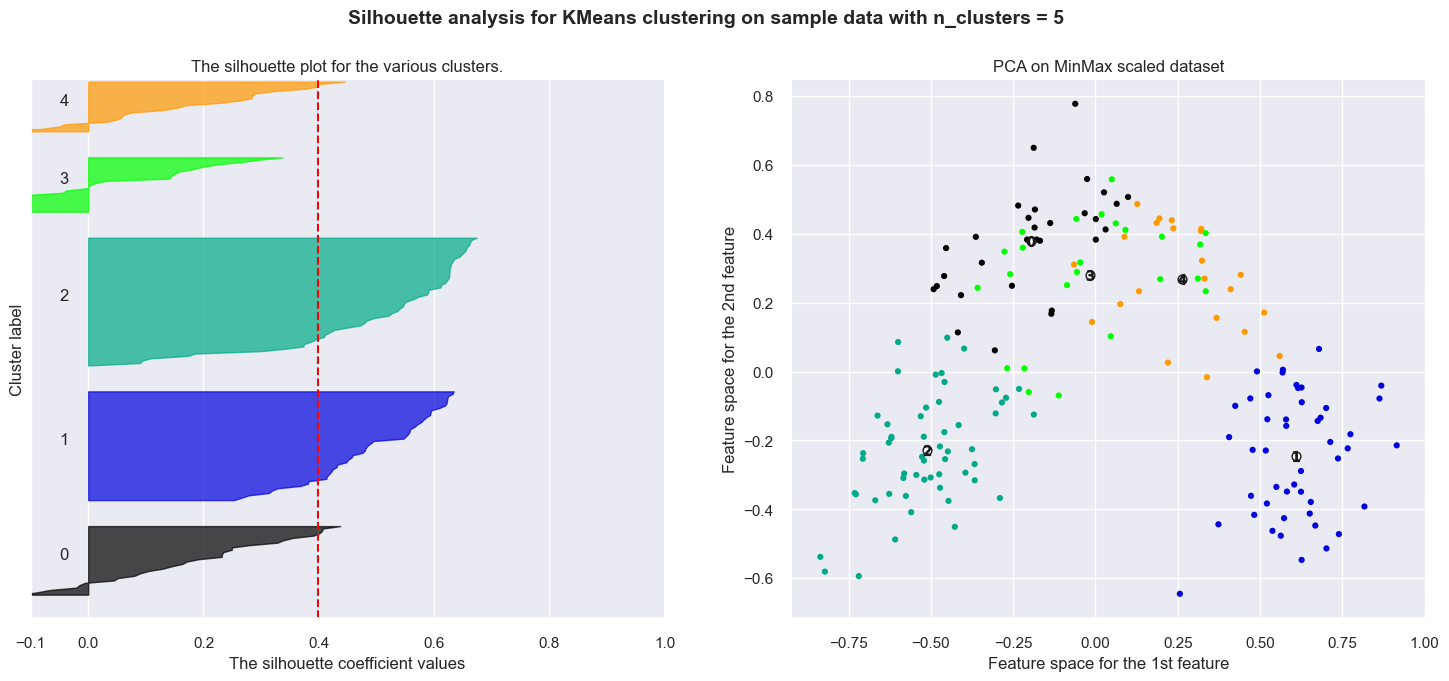

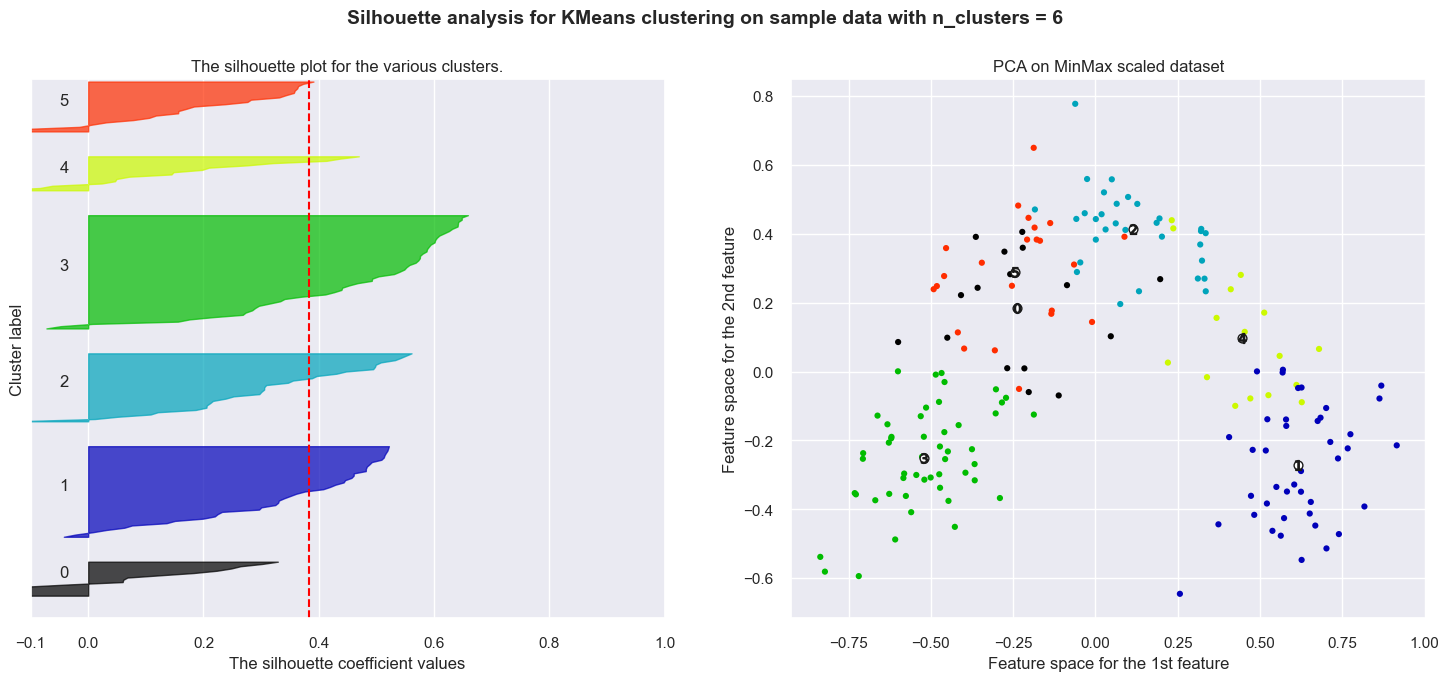

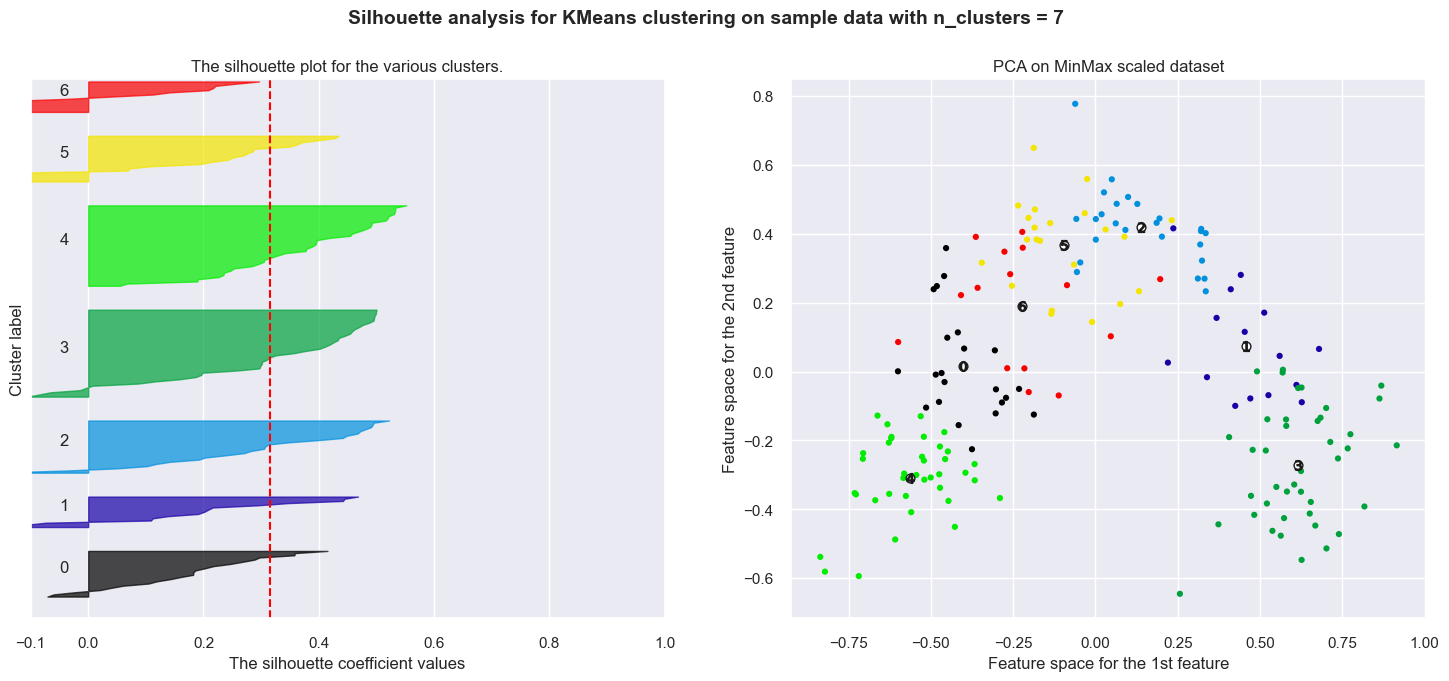

In [104]:
n_clusters = range(2,8)

for n in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(pca_std_df) + (n) * 10])

    kmeans = KMeans(n_clusters = n, random_state = 0)
    cluster_labels = kmeans.fit_predict(pca_minmax_df)

    silhouette_avg = silhouette_score(pca_minmax_df, cluster_labels)
    print('For n_clusters = ', n, 'the average silhouette_score is: ', silhouette_avg)

    sample_silhouette_values = silhouette_samples(pca_std_df, cluster_labels)

    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels ==i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                ith_cluster_silhouette_values,
                facecolor = color, edgecolor = color, alpha = 0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    ax1.axvline(x = silhouette_avg, color = 'red', linestyle ='--')

    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

    #2nd plot 
    color = cm.nipy_spectral(cluster_labels.astype(float)/n)
    ax2.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], marker = 'o', s = 20, lw = 0,
                c = color, edgecolor = 'k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker  = 'o', 
                c = 'white', alpha = 1, s = 40, edgecolor = 'k')


    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1], marker = '$%d$' % i , alpha = 1,
                    s = 50, edgecolor = 'k')


    ax2.set_title('PCA on MinMax scaled dataset')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')

plt.show()

## Build KMeans cluster using k = 3 on PCA and MinMax scaled data

In [105]:
model = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++')
y_pred = model.fit_predict(pca_minmax_df)
y_pred.shape

(178,)

In [106]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [107]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [108]:
model.cluster_centers_

array([[ 0.59750634, -0.21895939, -0.01057291],
       [-0.48503975, -0.17742871, -0.0046045 ],
       [ 0.01701227,  0.36612572,  0.01352436]])

In [109]:
model.inertia_

18.93826083046643

In [110]:
data['Kmeans_mm'] = model.labels_
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Kmeans_std  \
0           0.28             2.29   5.64  1.04      3.92     1065           2   
1           0.26             1.28   4.38  1.05      3.40     1050           2   
2           0.30             2.81   5.68  1.03      3.17     1185           2   
3           0.24             2.18   7.80  0.86      3.45     1480           2   
4           0.39             1.82   4.32  1.04      2.93      735           2   

   Kmeans_mm  
0          1  
1          1  
2          1  
3          1  
4          1

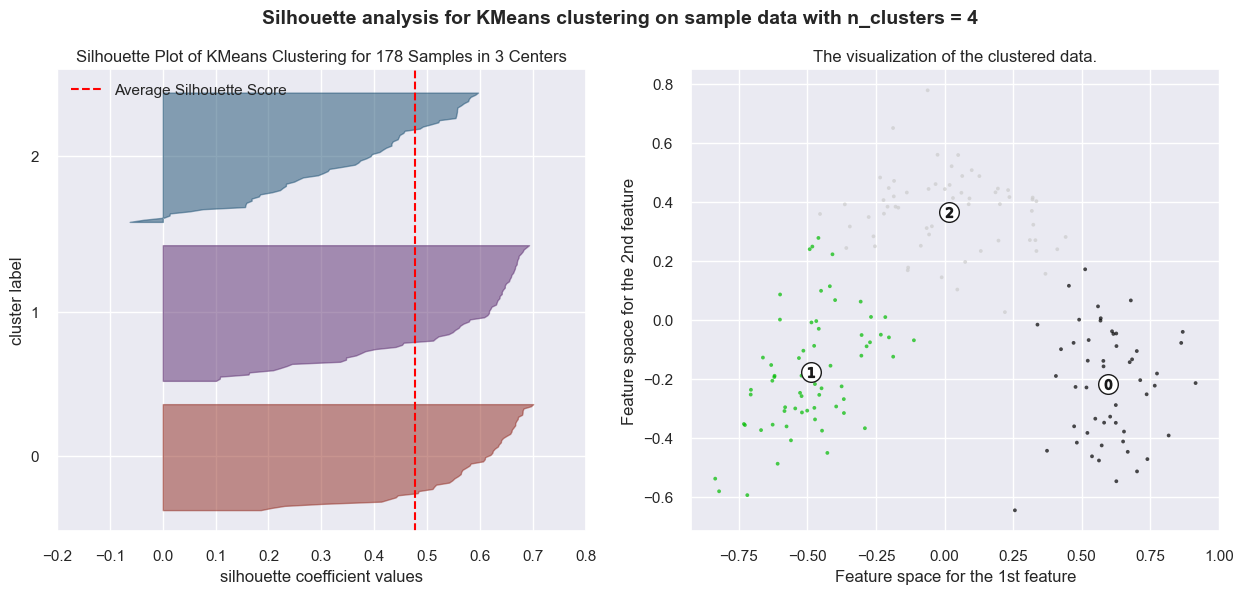

In [114]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = sv(model,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model.labels_.astype(float) / 2) # 3 is number of clusters
ax2.scatter(pca_minmax_df.iloc[:, 0], pca_minmax_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

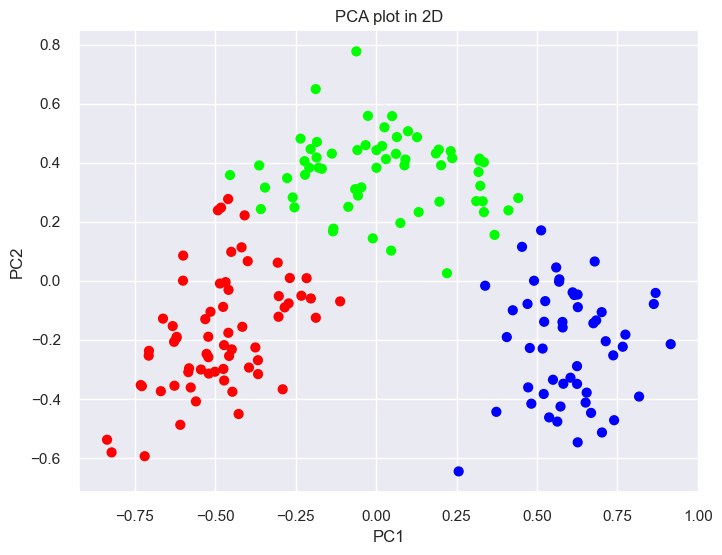

In [116]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Kmeans_mm'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [118]:
cluster1 = pd.DataFrame(data.loc[data.Kmeans_mm==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data.loc[data.Kmeans_mm==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(data.loc[data.Kmeans_mm==2].mean(),columns= ['Cluster3_avg'])

In [119]:
avg_df = pd.concat([cluster1, cluster2, cluster3], axis = 1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster3_avg
Type                 2.941176      1.092308      2.000000
Alcohol             13.134118     13.656923     12.202742
Malic                3.307255      1.946154      1.946774
Ash                  2.417647      2.437692      2.249839
Alcalinity          21.241176     17.441538     20.211290
Magnesium           98.666667    106.584615     93.451613
Phenols              1.683922      2.864615      2.200806
Flavanoids           0.818824      2.970000      2.038710
Nonflavanoids        0.451961      0.284308      0.369032
Proanthocyanins      1.145882      1.923846      1.607903
Color                7.234706      5.361692      2.949355
Hue                  0.691961      1.071385      1.056387
Dilution             1.696667      3.148923      2.801129
Proline            619.058824   1080.107692    502.709677
Kmeans_std           1.000000      1.876923      0.032258
Kmeans_mm            0.000000      1.000000      2.000000

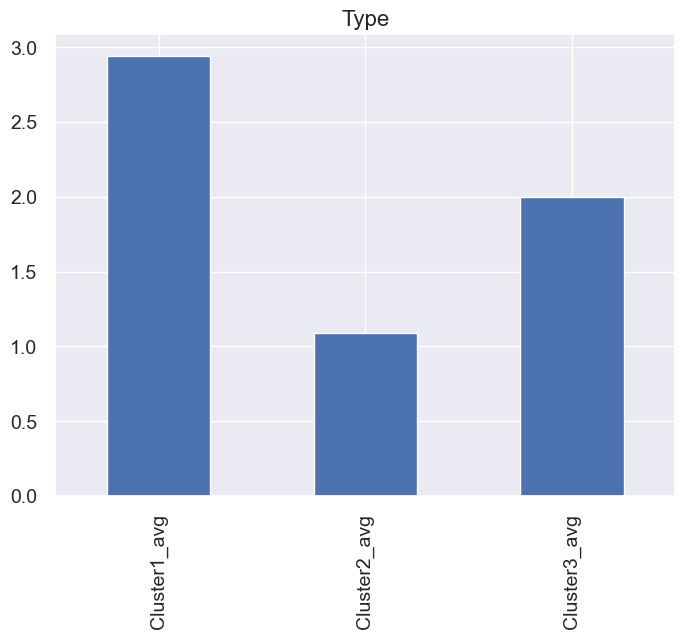

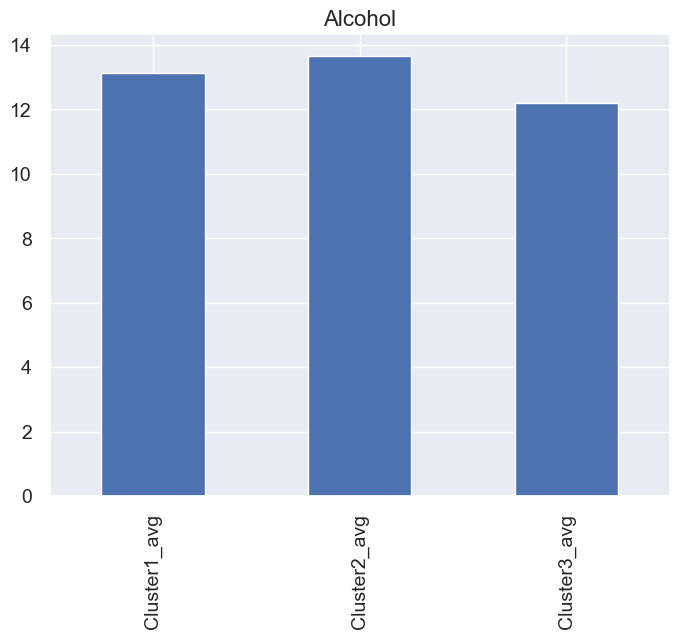

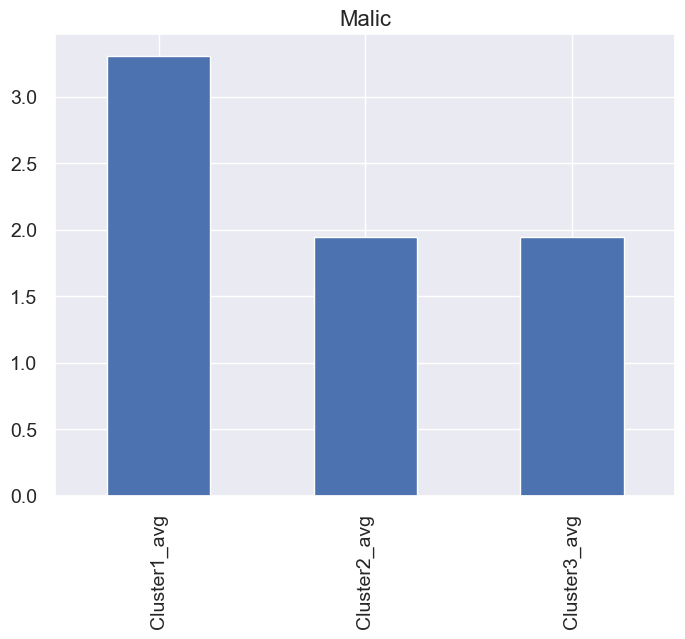

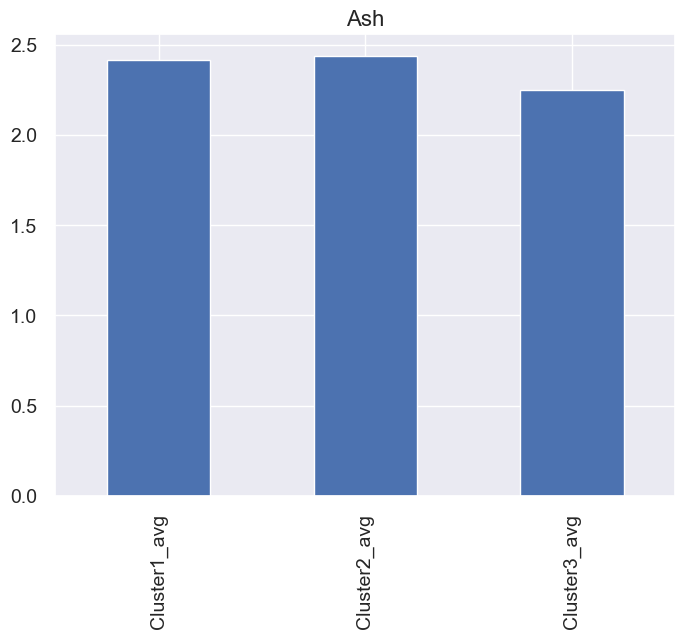

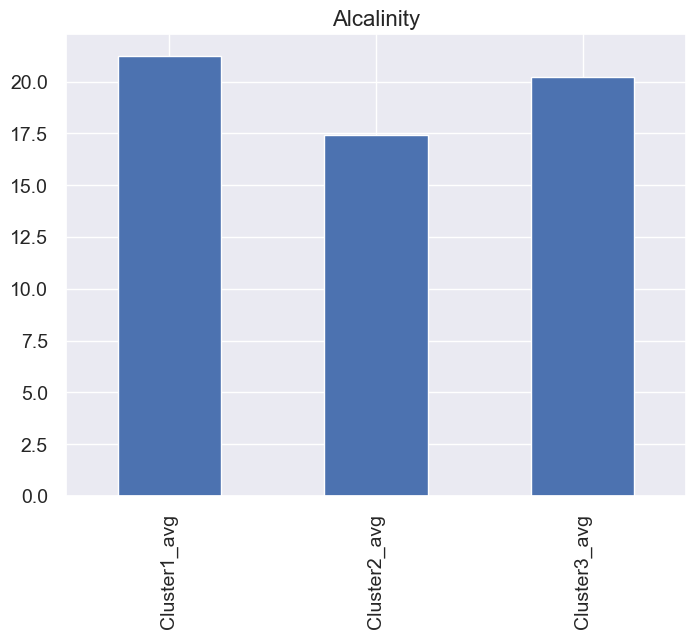

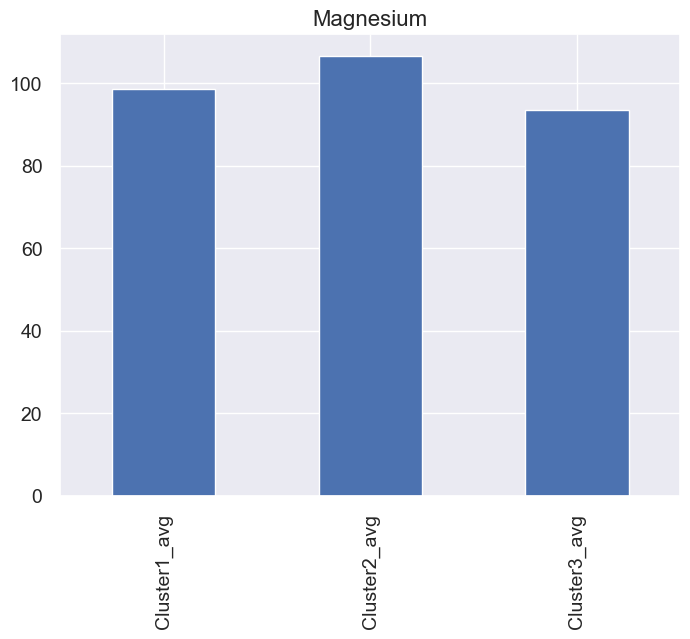

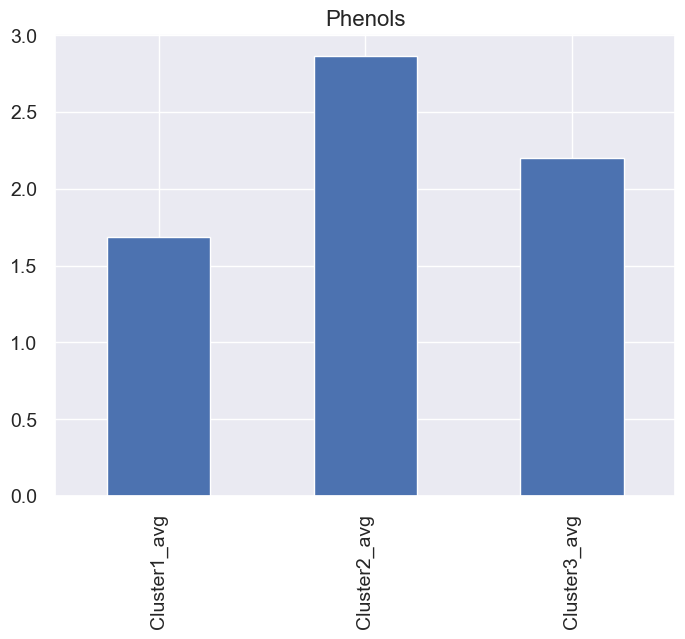

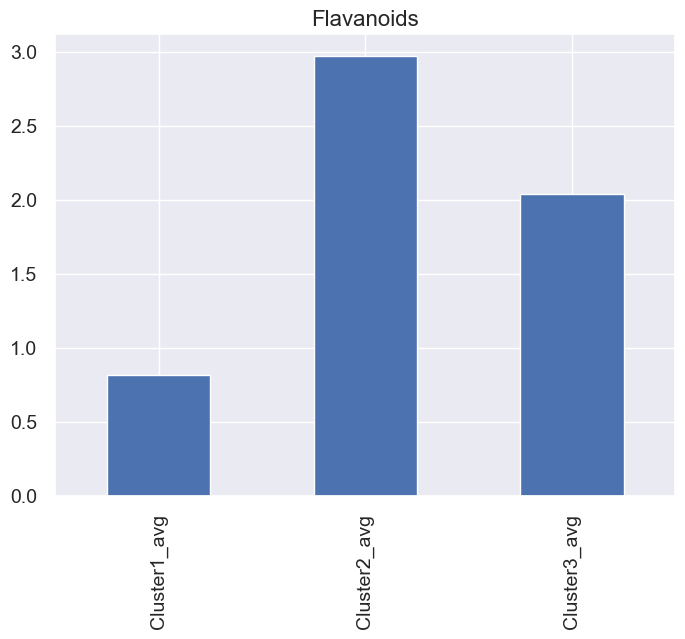

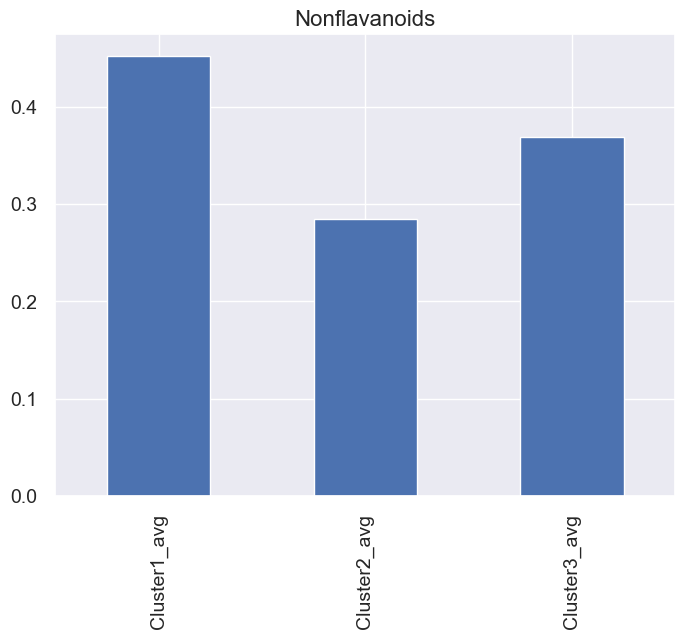

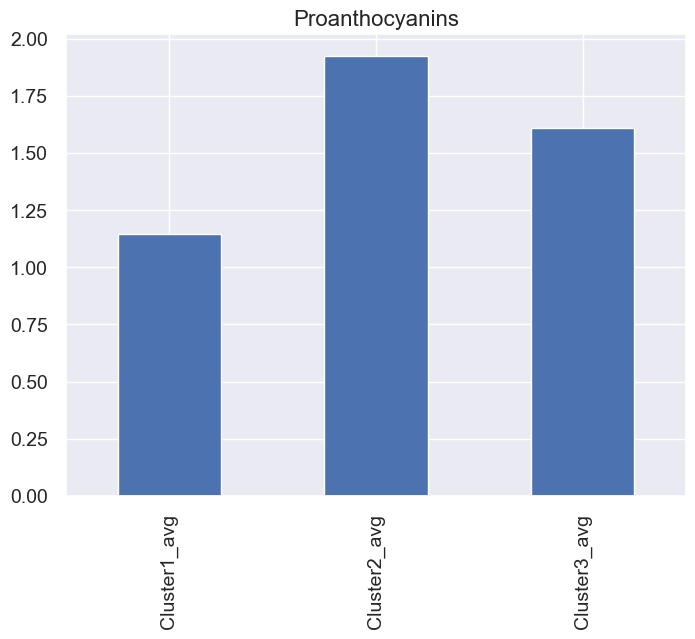

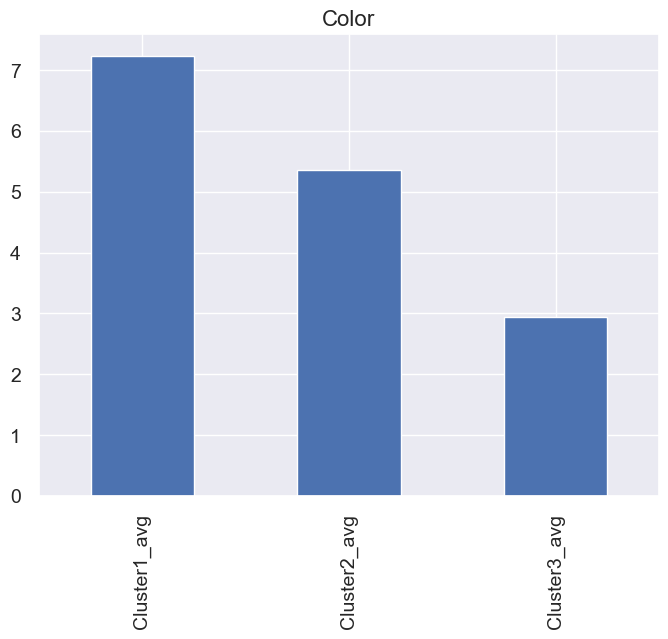

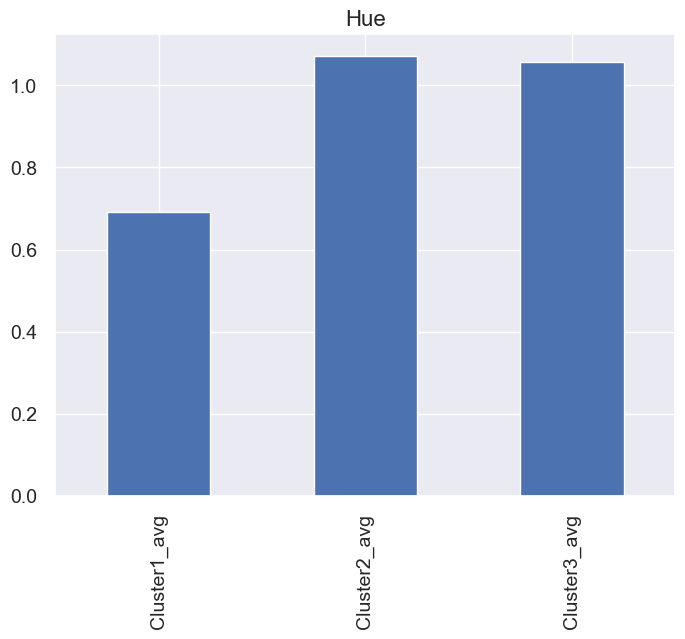

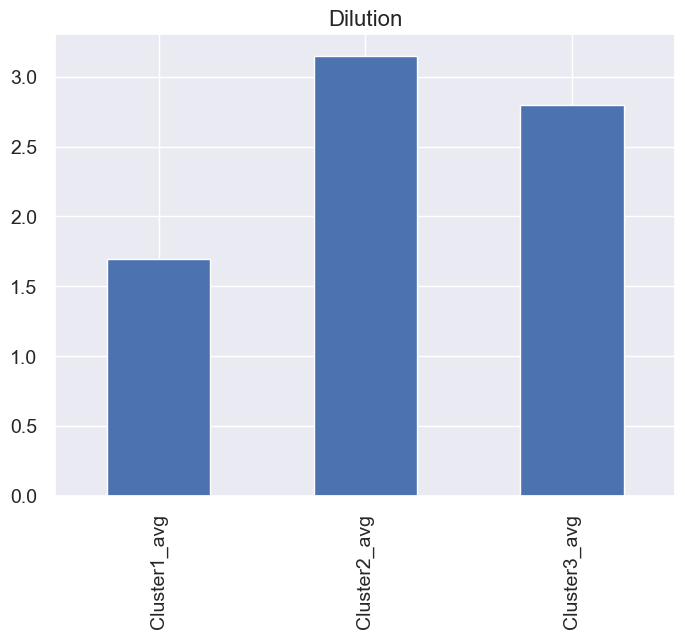

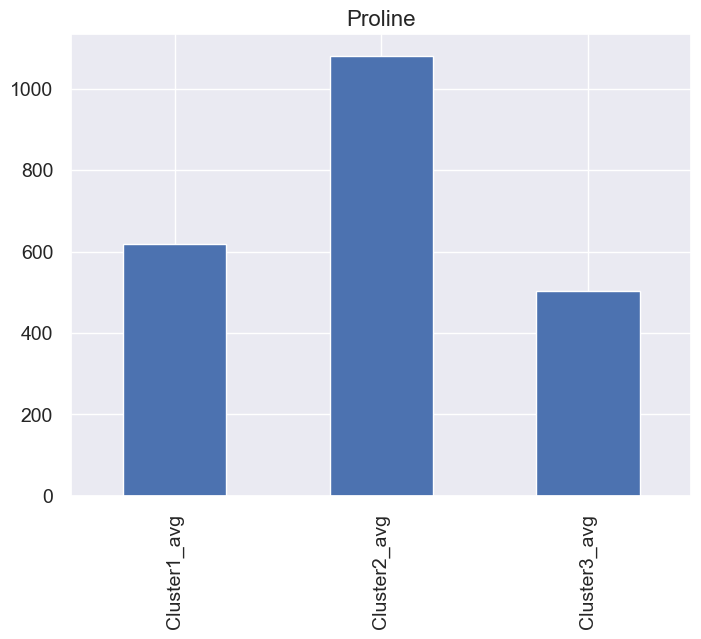

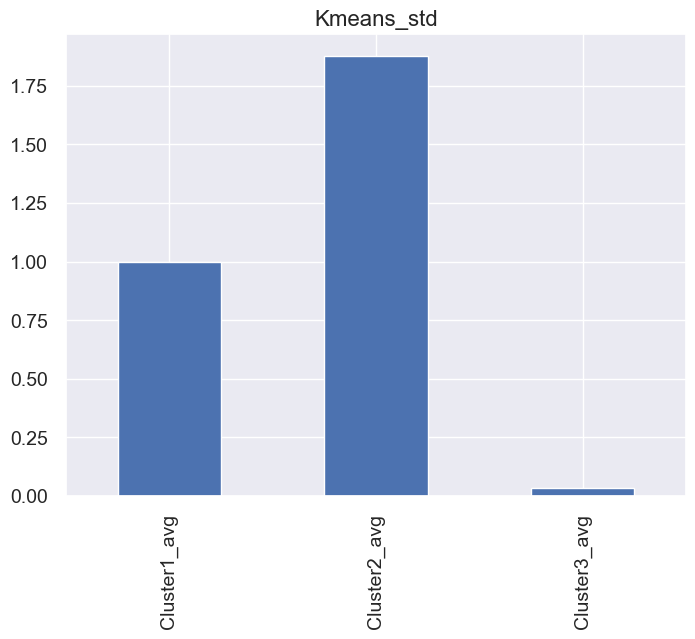

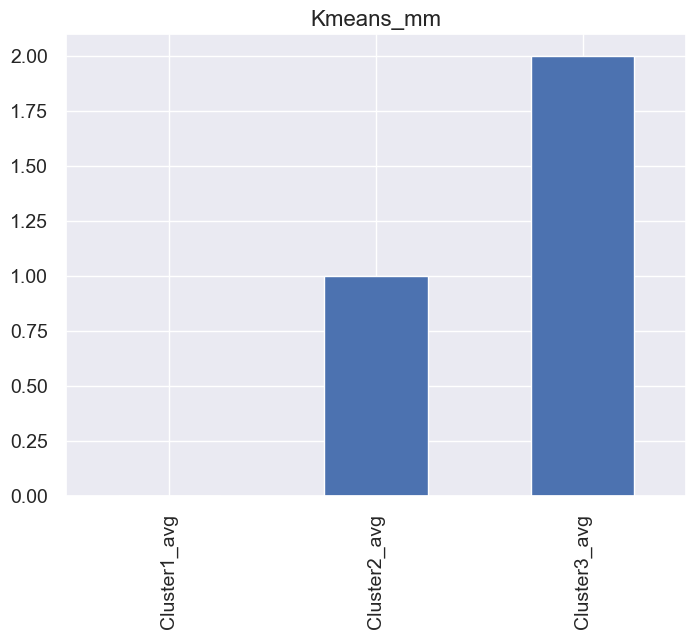

In [120]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

## Comparing KMeans clustering with the original classified dataset

### MinMax Sclaed data

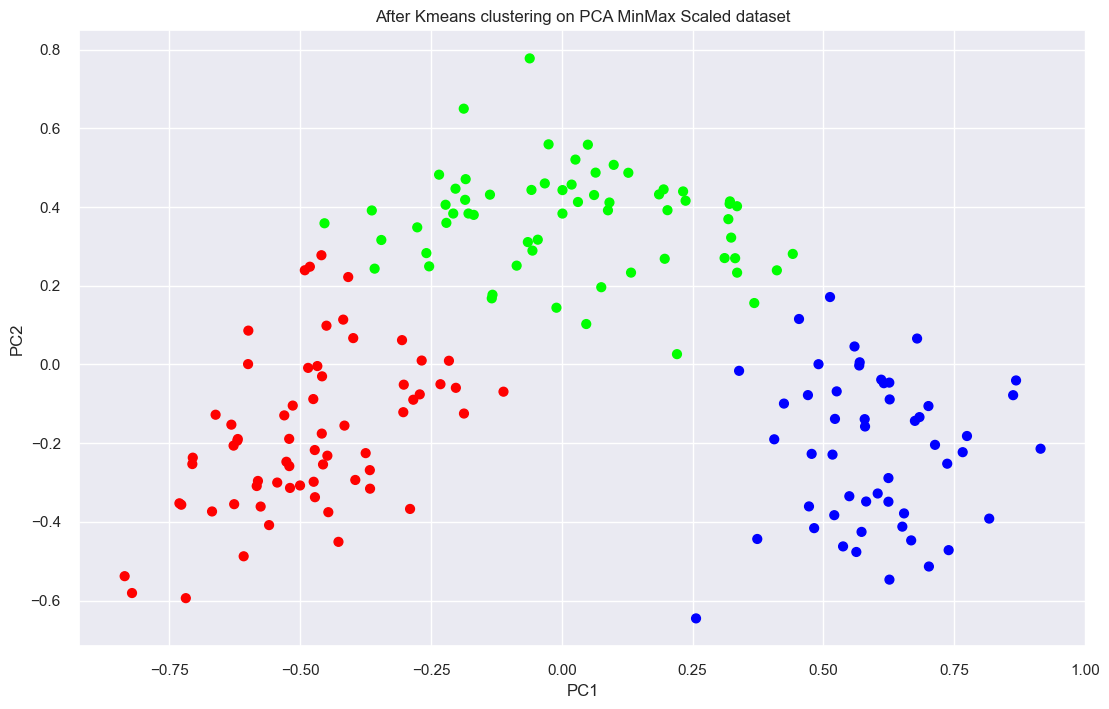

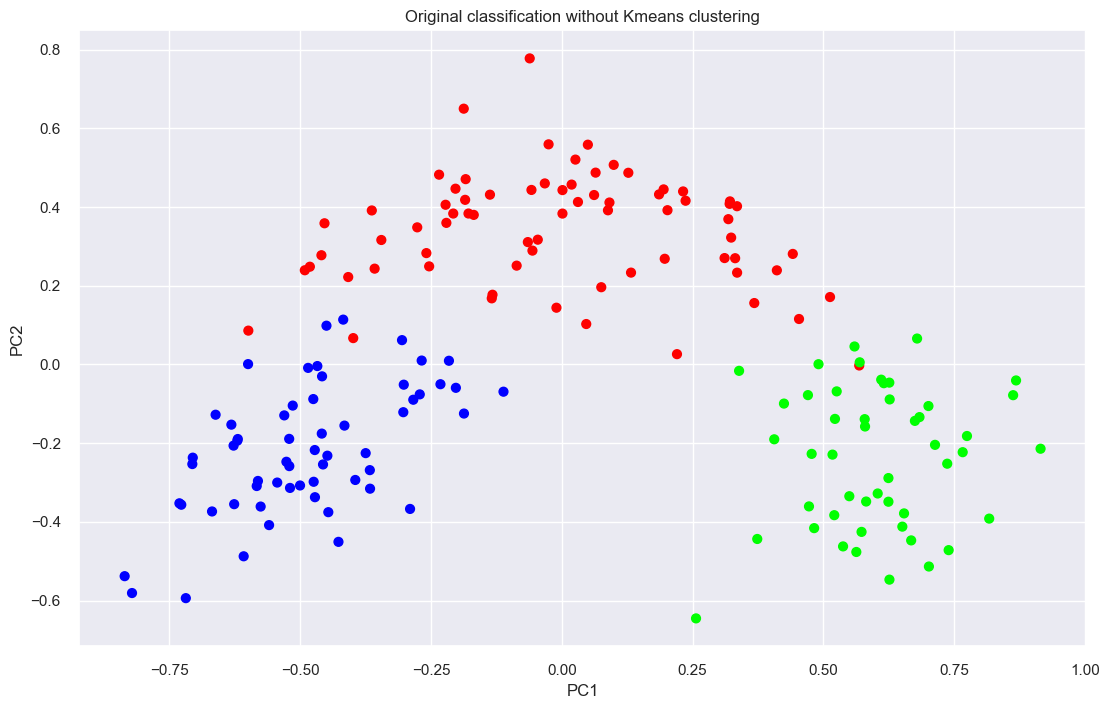

In [123]:
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c = data['Kmeans_mm'], cmap = 'brg', s = 40)

plt. title('After Kmeans clustering on PCA MinMax Scaled dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c = data['Type'], cmap = 'brg', s = 40)

plt. title('Original classification without Kmeans clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [125]:
display('After Applying PCA and Kmens CLustering on Dataset',data.groupby('Kmeans_mm').agg(['mean']))
display('After Applying PCA and Kmens CLustering on Dataset',data.groupby('Type').agg(['mean']))


'After Applying PCA and Kmens CLustering on Dataset'

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
               mean       mean      mean      mean       mean        mean   
Kmeans_mm                                                                   
0          2.941176  13.134118  3.307255  2.417647  21.241176   98.666667   
1          1.092308  13.656923  1.946154  2.437692  17.441538  106.584615   
2          2.000000  12.202742  1.946774  2.249839  20.211290   93.451613   

            Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
               mean       mean          mean            mean      mean   
Kmeans_mm                                                                
0          1.683922   0.818824      0.451961        1.145882  7.234706   
1          2.864615   2.970000      0.284308        1.923846  5.361692   
2          2.200806   2.038710      0.369032        1.607903  2.949355   

                Hue  Dilution      Proline Kmeans_std  
               mean      mean         mean       mean  
Kmeans_mm                                              
0          0.691961  1.696667   619.058824   1.000000  
1          1.071385  3.148923  1080.107692   1.876923  
2          1.056387  2.801129   502.709677   0.032258

'After Applying PCA and Kmens CLustering on Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline Kmeans_std Kmeans_mm  
             mean       mean      mean  
Type                                    
1     1115.711864   2.000000  1.000000  
2      519.507042   0.126761  1.830986  
3      629.895833   1.000000  0.000000

If we look closely, then we'll see that those clusters which are labeled as 2 by the KMeans clustering algorithm are perfectly labeled. 

Rest, those with label 0 or 1, have little differences.

### Standard Sclaed data

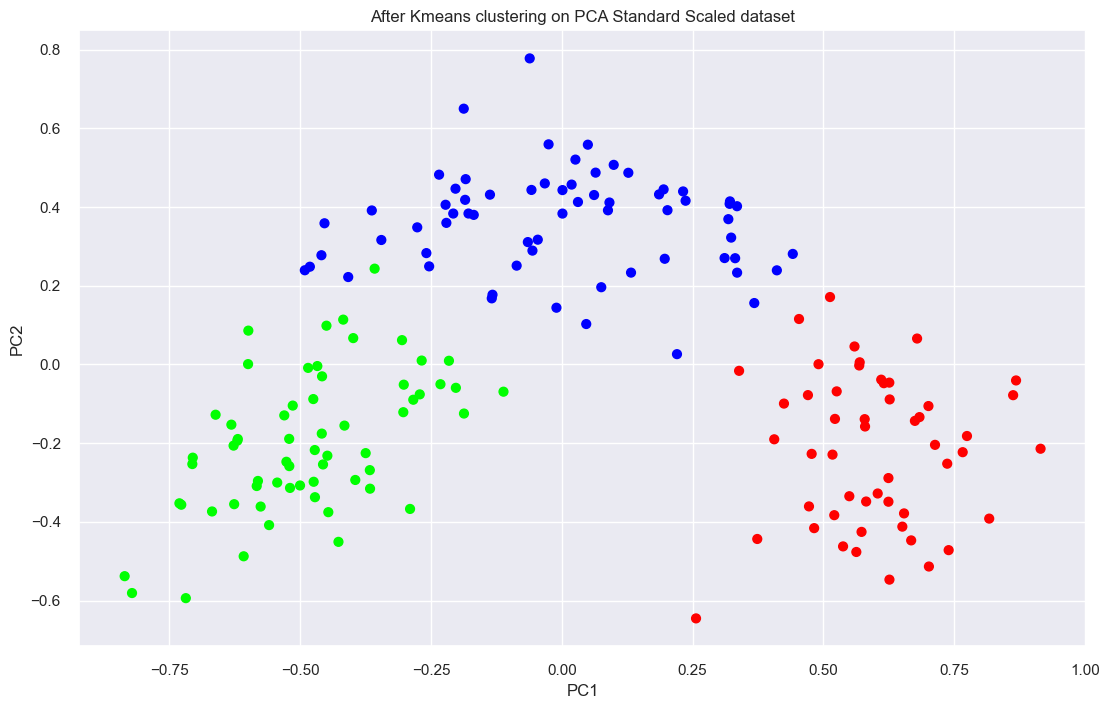

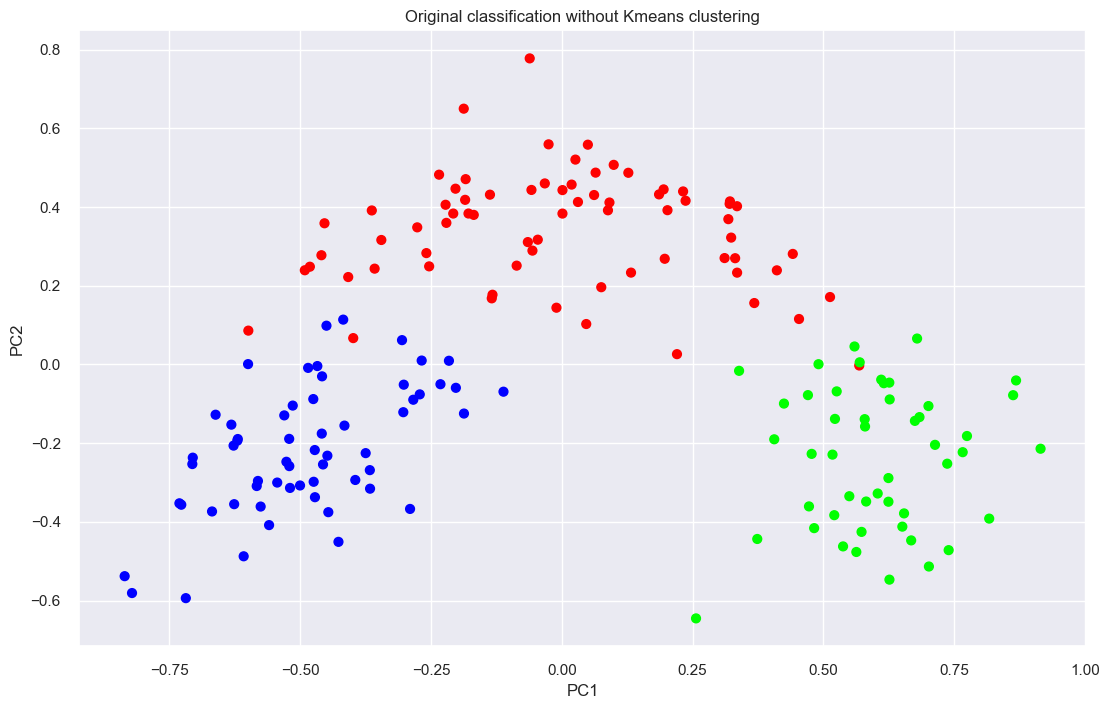

In [127]:
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c = data['Kmeans_std'], cmap = 'brg', s = 40)

plt. title('After Kmeans clustering on PCA Standard Scaled dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c = data['Type'], cmap = 'brg', s = 40)

plt. title('Original classification without Kmeans clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [128]:
display('After Applying PCA and Kmens CLustering on Dataset',data.groupby('Kmeans_std').agg(['mean']))
display('After Applying PCA and Kmens CLustering on Dataset',data.groupby('Type').agg(['mean']))


'After Applying PCA and Kmens CLustering on Dataset'

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                mean       mean      mean      mean       mean        mean   
Kmeans_std                                                                   
0           2.000000  12.250923  1.897385  2.231231  20.063077   92.738462   
1           2.941176  13.134118  3.307255  2.417647  21.241176   98.666667   
2           1.048387  13.676774  1.997903  2.466290  17.462903  107.967742   

             Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                mean       mean          mean            mean      mean   
Kmeans_std                                                                
0           2.247692   2.050000      0.357692        1.624154  2.973077   
1           1.683922   0.818824      0.451961        1.145882  7.234706   
2           2.847581   3.003226      0.292097        1.922097  5.453548   

                 Hue  Dilution      Proline Kmeans_mm  
                mean      mean         mean      mean  
Kmeans_std                                             
0           1.062708  2.803385   510.169231  1.938462  
1           0.691961  1.696667   619.058824  0.000000  
2           1.065484  3.163387  1100.225806  1.016129

'After Applying PCA and Kmens CLustering on Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline Kmeans_std Kmeans_mm  
             mean       mean      mean  
Type                                    
1     1115.711864   2.000000  1.000000  
2      519.507042   0.126761  1.830986  
3      629.895833   1.000000  0.000000

Likewise, we see here, that those who are labled as 0, are labeled correctly, but those who are labled as 1 or 2 by the Kmeans clustering, those have some kind of error (though very little)

# Hierarchical Clustering Algorithm

In [130]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## Dendrograms on MinMax sclaed applied data

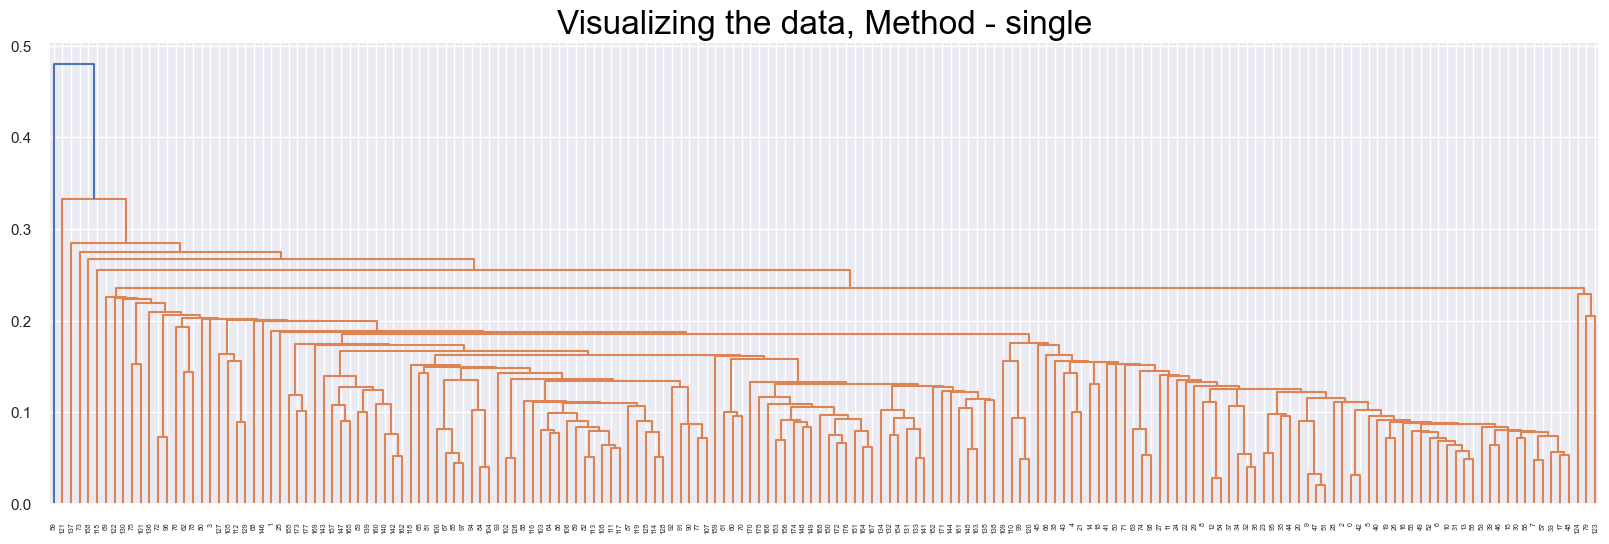

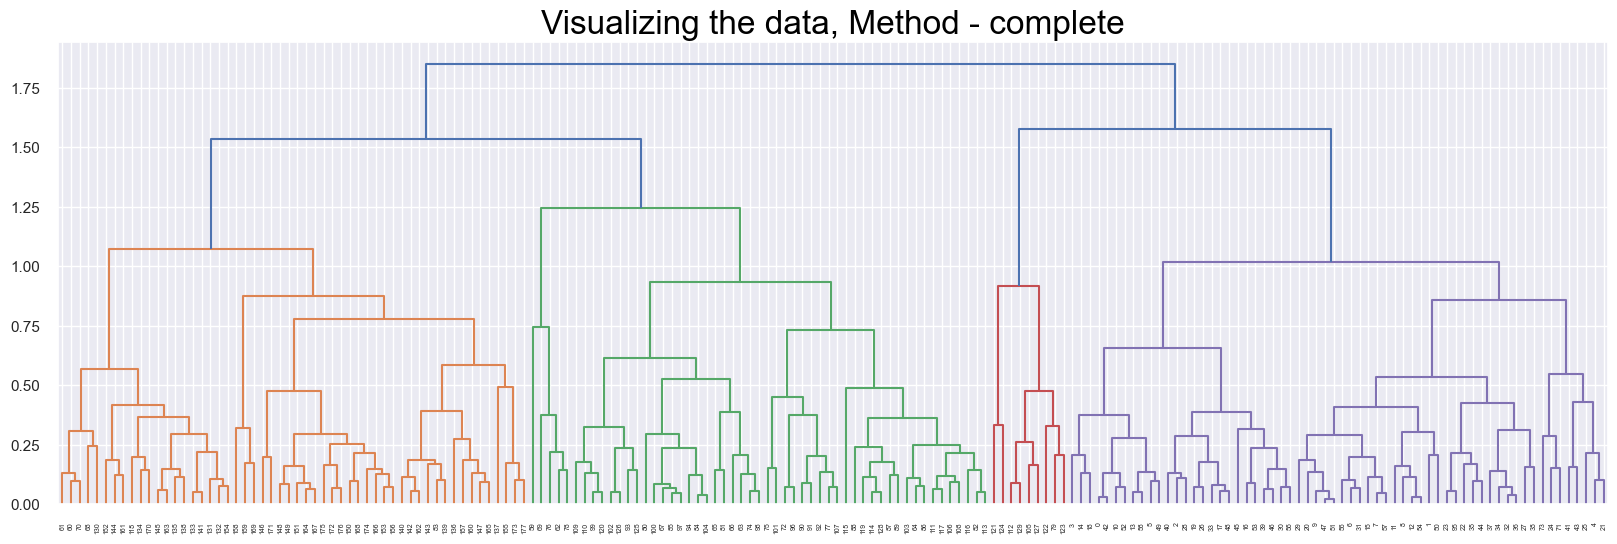

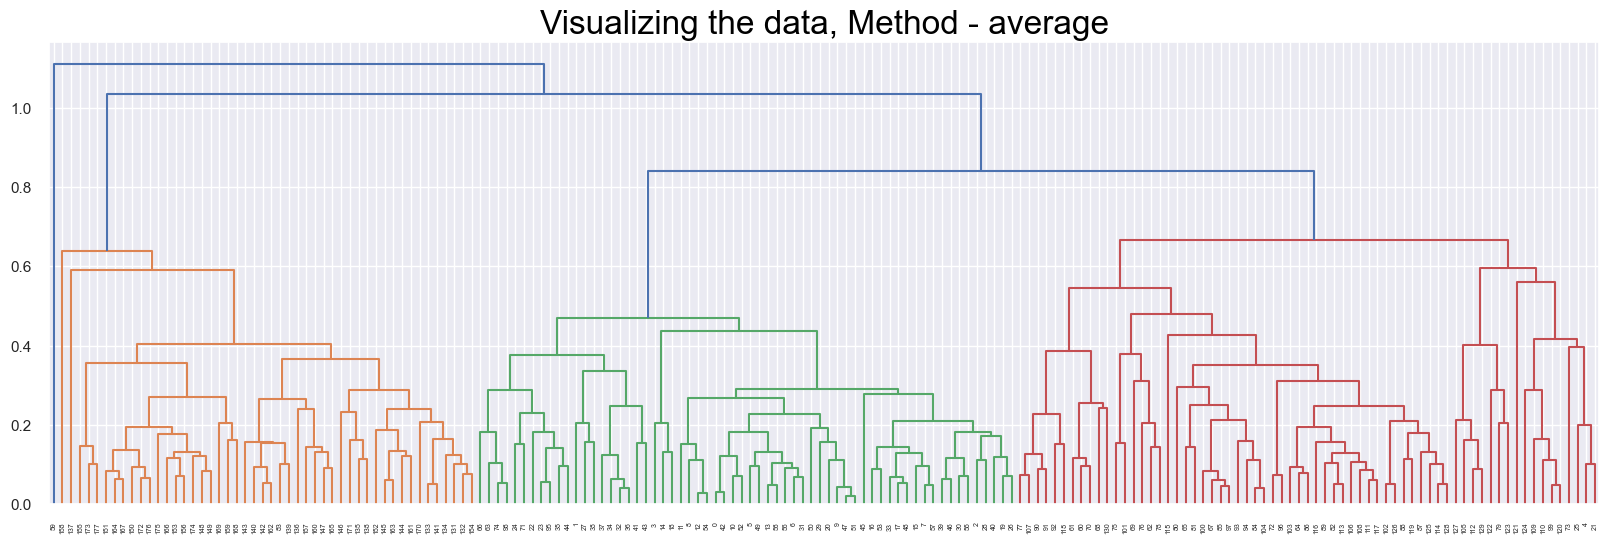

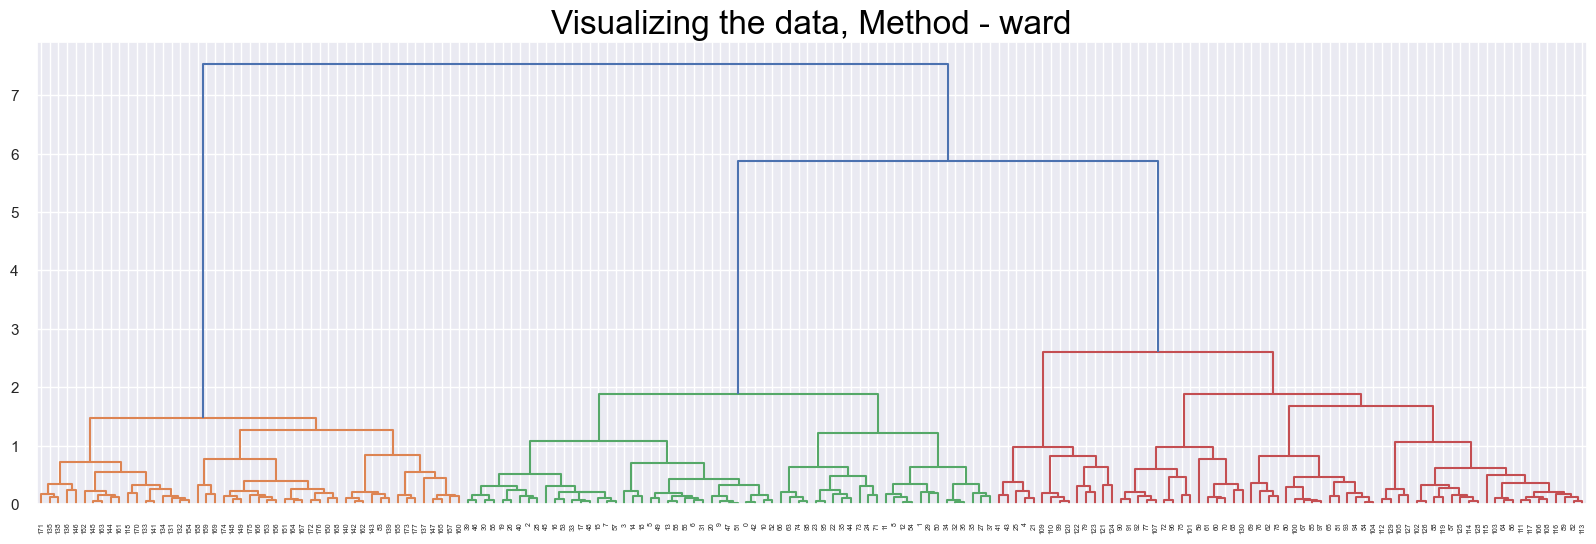

In [134]:
for methods in ['single','complete','average','ward']:
    plt.figure(figsize = (20,6))

    dict = {'fontsize': 24, 'fontweight': 16, 'color': 'black'}

    plt.title('Visualizing the data, Method - {}'.format(methods), fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

Single method is trying to label all into one cluster, so we'd not perfer using that. On the other hand, complete method has come up with 4 clusters, in which 3 are appropirate sized whereas 1 is a very small cluster. 

So, we are left with just Average and ward method. Both has done more or less the same grouping. It's just that the methodology involved for these two were different which is visible in the dendrograms.

## Silhouette score method for PCA MinMax scaled data

In [136]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for linkages in ["ward", "average"]: # I eliminated single and complete method based on dendograms
    for n in n_clusters:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = silhouette_score(pca_minmax_df, hie_labels1)
        print("For n_clusters =", n,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4276175866144028
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4596281708499888
For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42381275627339543
For n_clusters = 5 The average silhouette_score with linkage- ward : 0.358736072989302
For n_clusters = 6 The average silhouette_score with linkage- ward : 0.31999067500796646
For n_clusters = 7 The average silhouette_score with linkage- ward : 0.32024254972408744
For n_clusters = 8 The average silhouette_score with linkage- ward : 0.25278985240384183

For n_clusters = 2 The average silhouette_score with linkage- average : 0.26571303050122885
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39054474828492275
For n_clusters = 4 The average silhouette_score with linkage- average : 0.44723850921169306
For n_clusters = 5 The average silhouette_score with linkage- average : 0.4308322131648259
For n_cluster

Here, we can see that ward method is giving preferrable clusters to be 3, whereas average method is giving perferrable clusters to be 4. 

But the silhouette score for ward method for 3 clusters is higer, so I am gonna perfer that while doing my further calculations. 

## Dendrograms on Standard scaled applied dataset

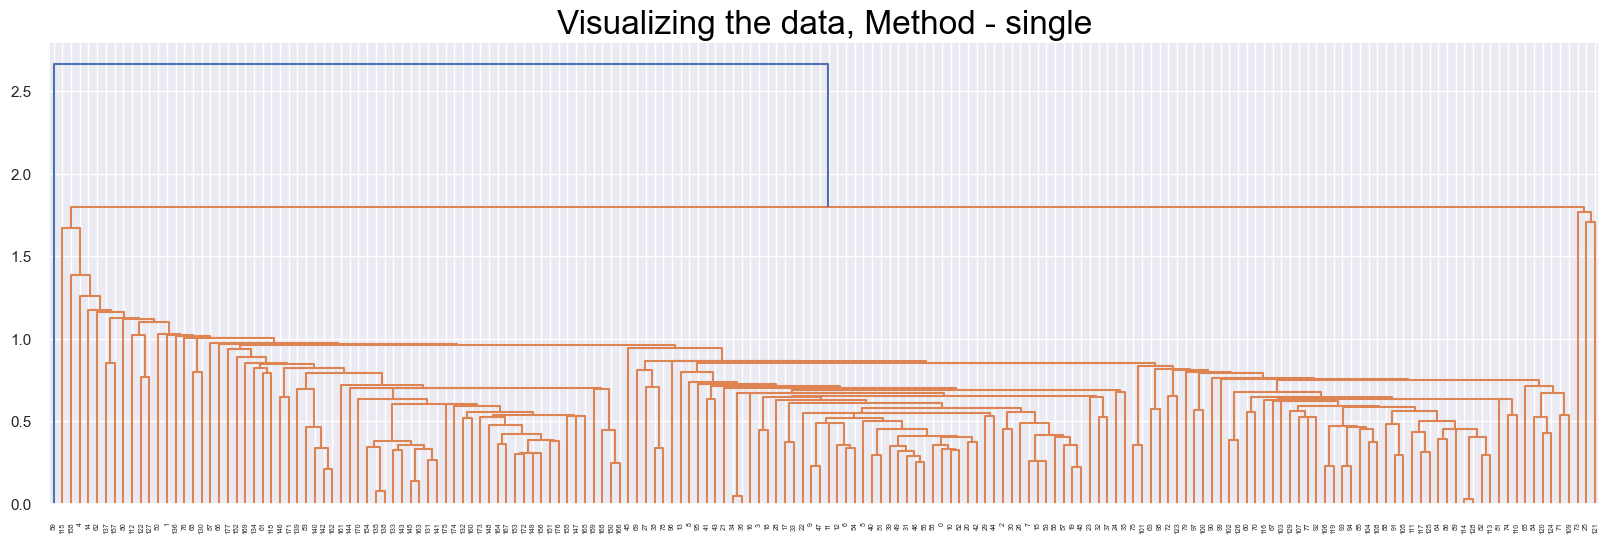

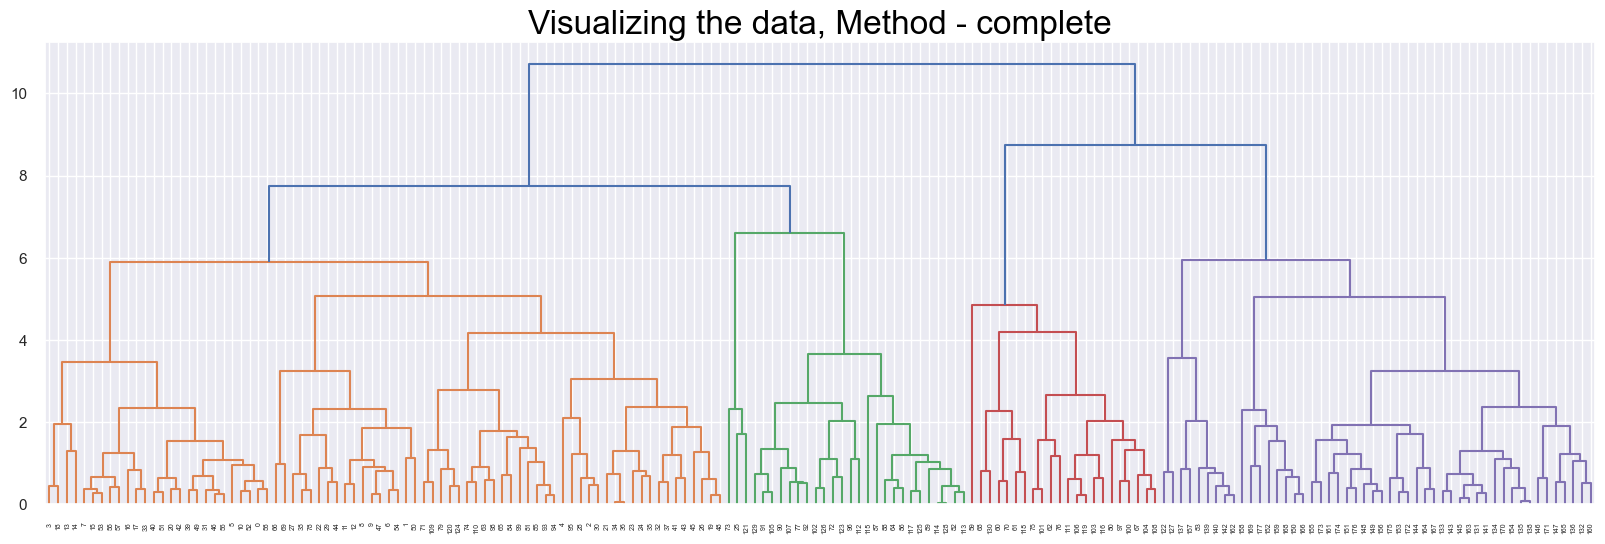

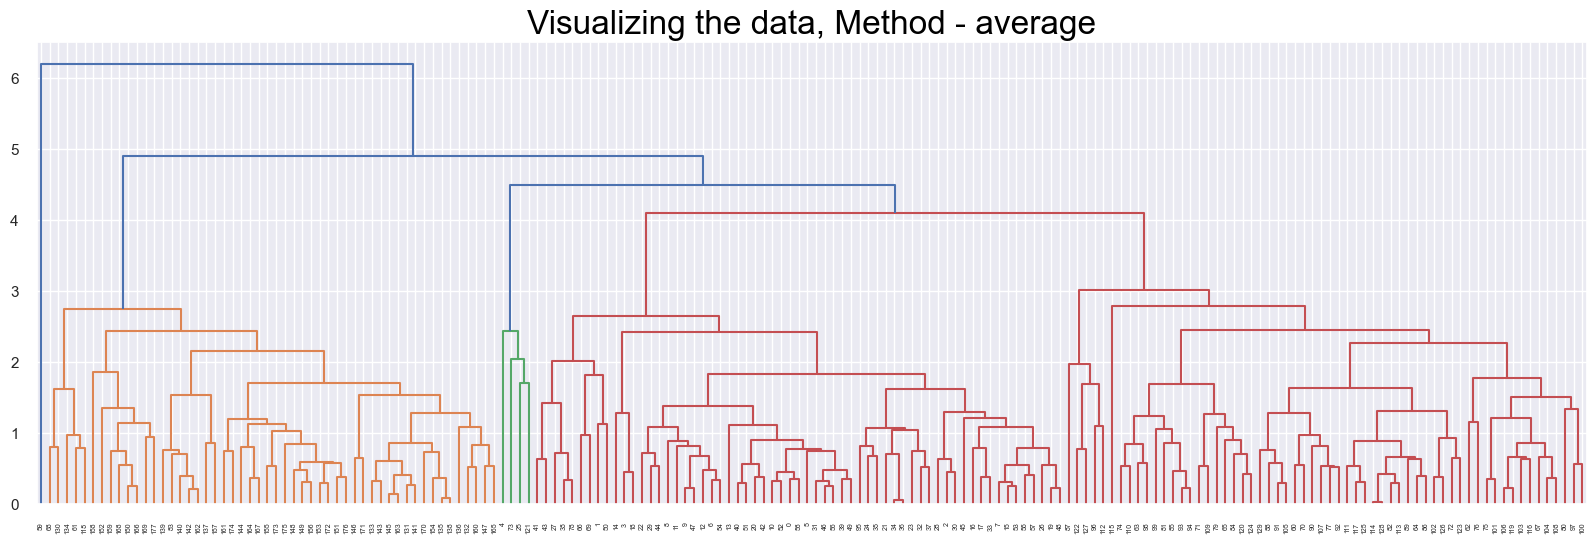

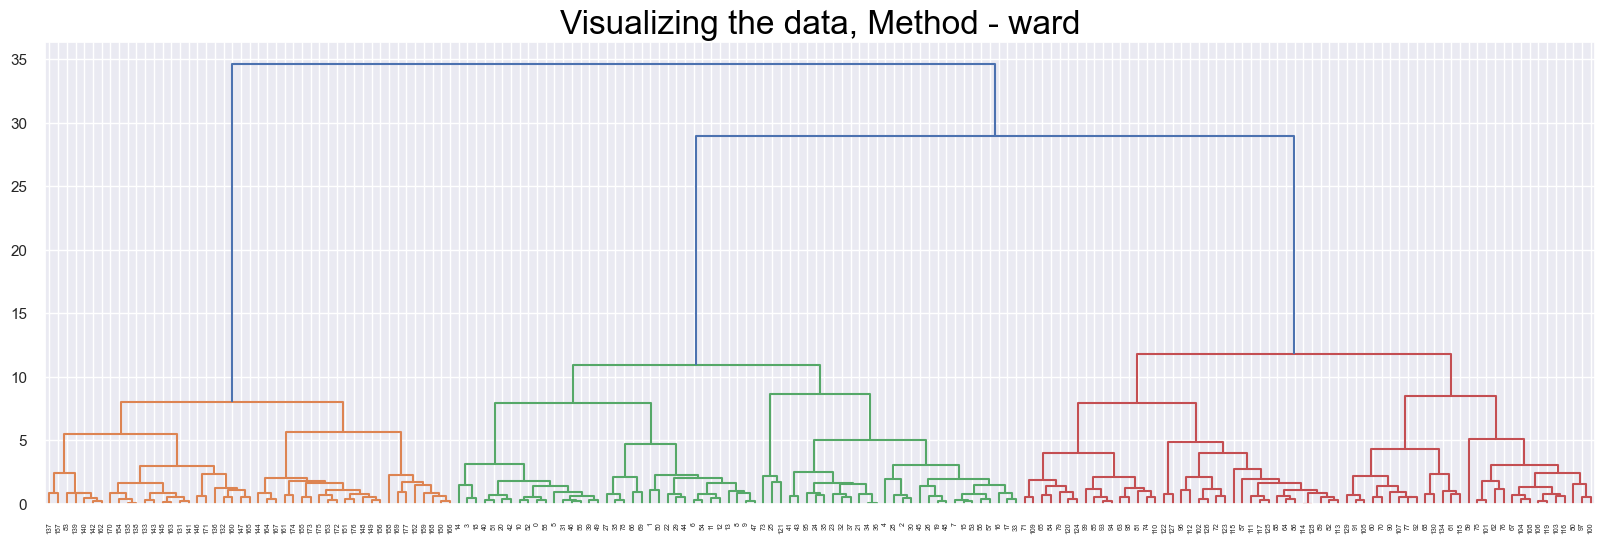

In [137]:
for methods in ['single','complete','average','ward']:
    plt.figure(figsize = (20,6))

    dict = {'fontsize': 24, 'fontweight': 16, 'color': 'black'}

    plt.title('Visualizing the data, Method - {}'.format(methods), fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

Clearly, here single method is trying to club-up all the samples into one cluster, so single method is clearly not a good choice. 

Average and complete method on the other hand are trying to come up with 4 clusters of uneven sizes. So, i'd also not perfer those methodologies. 

So, am just going to do my calculation for the ward method

## Silhouette score method for PCA standard scaled data

In [138]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for linkages in ["ward"]: # I eliminated single, average and complete method based on dendograms
    for n in n_clusters:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.395090372250754
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.44594921980629704
For n_clusters = 4 The average silhouette_score with linkage- ward : 0.38195690348144407
For n_clusters = 5 The average silhouette_score with linkage- ward : 0.31948816174663447
For n_clusters = 6 The average silhouette_score with linkage- ward : 0.31993269879897357
For n_clusters = 7 The average silhouette_score with linkage- ward : 0.2890224763575289
For n_clusters = 8 The average silhouette_score with linkage- ward : 0.2671234478397109



So, here also, the perferred value for the number of clusters is 3! So, we arer going to use that only.

## Running Hierarchical clustering for PCA on standard scaled data

In [140]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward') #default affinity is eculidean
y_pred = agg_clustering.fit_predict(pca_std_df)
print(y_pred.shape)
y_pred

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [141]:
agg_clustering.n_clusters_

3

In [142]:
(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

44.595

In [143]:
data['hie_std'] = agg_clustering.labels_
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Kmeans_std  \
0           0.28             2.29   5.64  1.04      3.92     1065           2   
1           0.26             1.28   4.38  1.05      3.40     1050           2   
2           0.30             2.81   5.68  1.03      3.17     1185           2   
3           0.24             2.18   7.80  0.86      3.45     1480           2   
4           0.39             1.82   4.32  1.04      2.93      735           2   

   Kmeans_mm  hie_std  
0          1        2  
1          1        2  
2          1        2  
3          1        2  
4          1        2

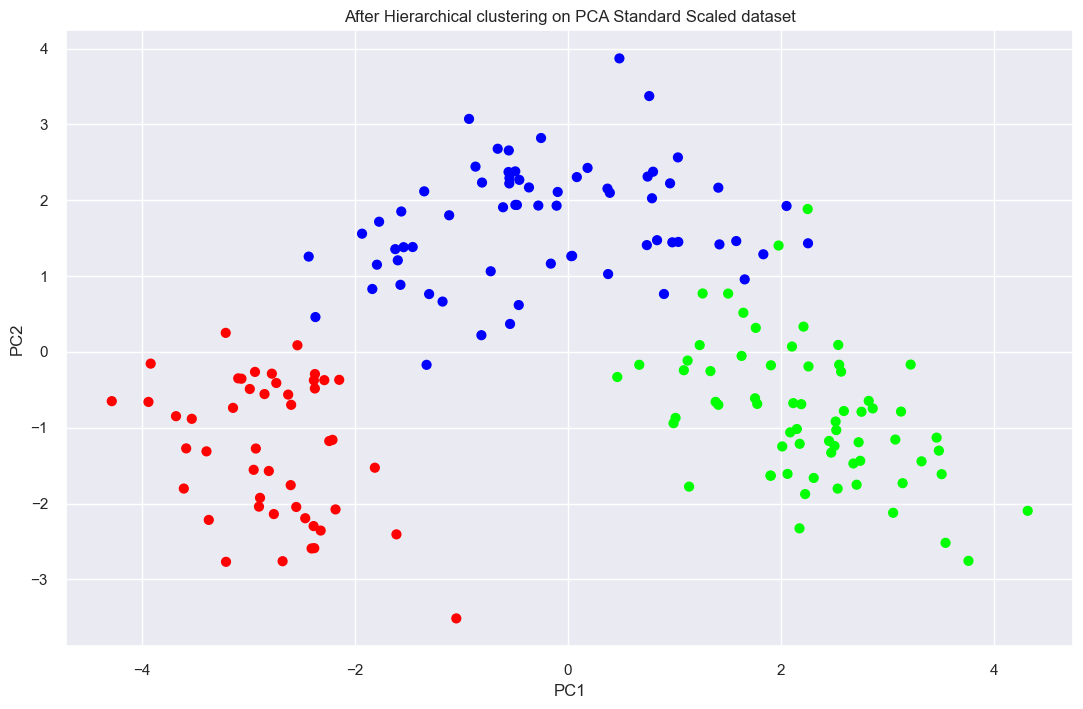

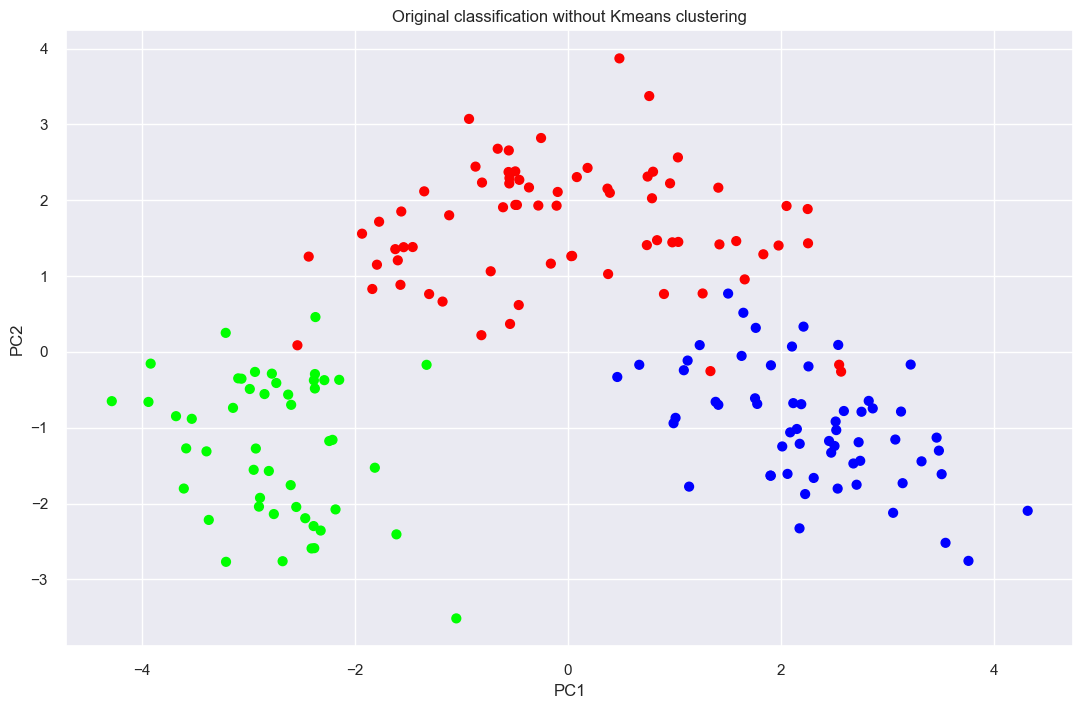

In [145]:
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c = data['hie_std'], cmap = 'brg', s = 40)

plt. title('After Hierarchical clustering on PCA Standard Scaled dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c = data['Type'], cmap = 'brg', s = 40)

plt. title('Original classification without Kmeans clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [146]:
display('After Applying PCA and Hierarchical CLustering on Dataset',data.groupby('hie_std').agg(['mean']))
display('Original Dataset',data.groupby('Type').agg(['mean']))


'After Applying PCA and Hierarchical CLustering on Dataset'

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
             mean       mean      mean      mean       mean        mean   
hie_std                                                                   
0        2.030303  12.264242  1.932121  2.245455  20.087879   91.666667   
1        2.978723  13.171489  3.431702  2.441064  21.595745   98.829787   
2        1.092308  13.624769  1.954769  2.435538  17.373846  108.600000   

          Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
             mean       mean          mean            mean      mean   
hie_std                                                                
0        2.220152   1.991364      0.367727        1.540455  3.036364   
1        1.674894   0.792979      0.452766        1.165957  7.452553   
2        2.819692   2.961692      0.290154        1.949385  5.379538   

              Hue  Dilution      Proline Kmeans_std Kmeans_mm  
             mean      mean         mean       mean      mean  
hie_std                                                        
0        1.042515  2.729848   504.439394   0.060606  1.833333  
1        0.682979  1.702553   627.021277   1.000000  0.000000  
2        1.069538  3.149077  1079.753846   1.907692  1.046154

'Original Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline Kmeans_std Kmeans_mm   hie_std  
             mean       mean      mean      mean  
Type                                              
1     1115.711864   2.000000  1.000000  2.000000  
2      519.507042   0.126761  1.830986  0.183099  
3      629.895833   1.000000  0.000000  0.958333

Therefore, there is very little difference in the original classification and the classification we achieved after performing Hierarchical clustering on the standard scaled data. 

## Running Hierarchical Clustering method for PCA on MinMax Scaled data

In [147]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward') #default affinity is eculidean
y_pred = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred.shape)
y_pred

(178,)


array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [148]:
agg_clustering.n_clusters_

3

In [150]:
(silhouette_score(pca_minmax_df, agg_clustering.labels_)*100).round(3)

45.963

In [151]:
data['hie_mm'] = agg_clustering.labels_

In [152]:
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Kmeans_std  \
0           0.28             2.29   5.64  1.04      3.92     1065           2   
1           0.26             1.28   4.38  1.05      3.40     1050           2   
2           0.30             2.81   5.68  1.03      3.17     1185           2   
3           0.24             2.18   7.80  0.86      3.45     1480           2   
4           0.39             1.82   4.32  1.04      2.93      735           2   

   Kmeans_mm  hie_std  hie_mm  
0          1        2       2  
1          1        2       2  
2          1        2       2  
3          1        2       2  
4          1        2       0

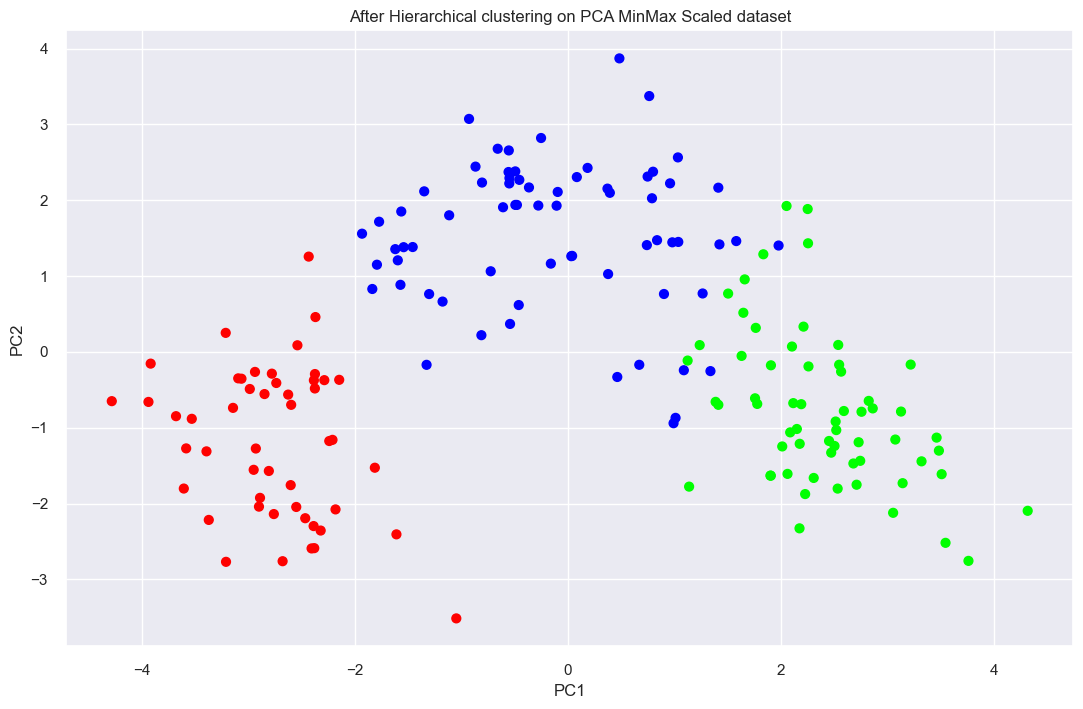

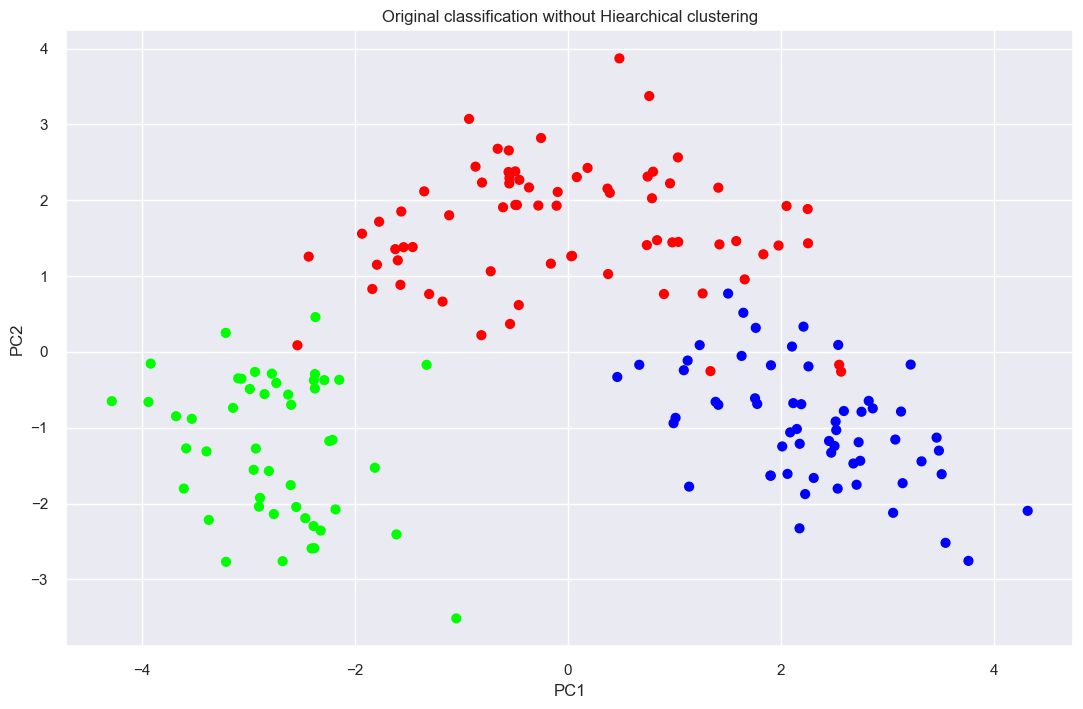

In [153]:
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c = data['hie_mm'], cmap = 'brg', s = 40)

plt. title('After Hierarchical clustering on PCA MinMax Scaled dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c = data['Type'], cmap = 'brg', s = 40)

plt. title('Original classification without Hiearchical clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [154]:
display('After Applying PCA and Hierarchical CLustering on Dataset',data.groupby('hie_mm').agg(['mean']))
display('Original Dataset',data.groupby('Type').agg(['mean']))


'After Applying PCA and Hierarchical CLustering on Dataset'

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
            mean       mean      mean      mean       mean        mean   
hie_mm                                                                   
0       1.941176  12.287794  2.037353  2.276765  20.144118   95.088235   
1       2.959184  13.149796  3.386939  2.427755  21.397959   98.163265   
2       1.114754  13.675410  1.825738  2.417377  17.242623  106.196721   

         Phenols Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
            mean       mean          mean            mean      mean      mean   
hie_mm                                                                          
0       2.197206   2.044853      0.369559        1.591765  3.077941  1.043324   
1       1.680612   0.797959      0.455306        1.160816  7.328980  0.684694   
2       2.897869   3.000984      0.278197        1.935410  5.441311  1.080820   

        Dilution      Proline Kmeans_std Kmeans_mm   hie_std  
            mean         mean       mean      mean      mean  
hie_mm                                                        
0       2.784265   527.617647   0.205882  1.867647  0.235294  
1       1.707143   622.285714   1.000000  0.000000  0.959184  
2       3.145902  1091.426230   1.836066  1.016393  1.868852

'Original Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline Kmeans_std Kmeans_mm   hie_std    hie_mm  
             mean       mean      mean      mean      mean  
Type                                                        
1     1115.711864   2.000000  1.000000  2.000000  1.830508  
2      519.507042   0.126761  1.830986  0.183099  0.225352  
3      629.895833   1.000000  0.000000  0.958333  0.979167

# Conclusion:

We have applied KMeans and Hierarchical clustering method on PCA applied data for both Standard Scaled data and MinMax Scaled data. 

The results were more or less similar for all the methods, but we have to pick one for our final result. 
So, I'd be picking KMeans applied on MinMax scaled data, becuase it gave the highest silhouette score, as comapred to others. 